<a href="https://colab.research.google.com/github/alxgrin/kaggle/blob/main/c/house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices - Advanced Regression Techniques

**Start here if...**

You have some experience with R or Python and machine learning basics. This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition. 

**Competition Description**

![img](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Practice Skills**

- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

**Acknowledgments**

The [Ames Housing dataset](http://www.amstat.org/publications/jse/v19n3/decock.pdf) was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.

**Data fields**

Here's a brief version of what you'll find in the data description file.

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Help: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [1]:
!pip install catboost

In [2]:
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostRegressor, Pool, cv, sum_models, to_regressor
from sklearn import preprocessing
from sklearn.model_selection import RepeatedKFold, train_test_split

In [3]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})

In [4]:
le = preprocessing.LabelEncoder()

# Загрузка данных

In [5]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
DATA_PATH = (
    "/content/drive/MyDrive/kaggle_data/c_house-prices-advanced-regression-techniques"
)
!ls $DATA_PATH

data_description.txt  sample_submission.csv.gz	test.csv.gz  train.csv.gz


In [7]:
sample_submission = pd.read_csv(
    DATA_PATH + "/sample_submission.csv.gz", index_col="Id", compression="gzip"
)
sample_submission

,SalePrice
Id,
1461,169277.052498
1462,187758.393989
1463,183583.683570
1464,179317.477511
1465,150730.079977
...,...
2915,167081.220949
2916,164788.778231
2917,219222.423400


In [8]:
train = pd.read_csv(DATA_PATH + "/train.csv.gz", index_col="Id", compression="gzip")
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [9]:
test = pd.read_csv(DATA_PATH + "/test.csv.gz", index_col="Id", compression="gzip")
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [10]:
df = pd.concat([train, test])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [12]:
(df.isna().sum() / len(df)).sort_values(ascending=False)

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
SalePrice        0.499829
                   ...   
1stFlrSF         0.000000
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
MSSubClass       0.000000
Length: 80, dtype: float64

# Анализ признаков и чистка данных

## MSSubClass (Класс здания)

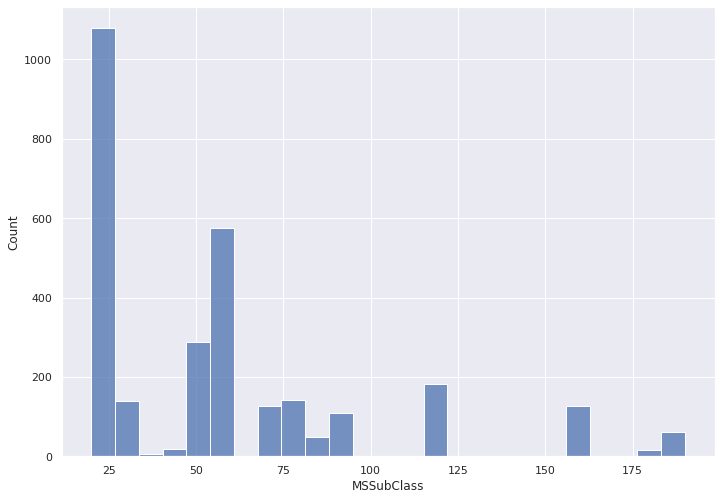

In [13]:
sns.histplot(x=df["MSSubClass"])

In [14]:
df["MSSubClass"].isna().sum() / len(df)

0.0

In [15]:
df["MSSubClass"] = le.fit_transform(df["MSSubClass"])

## MSZoning (Общая классификация зонирования)

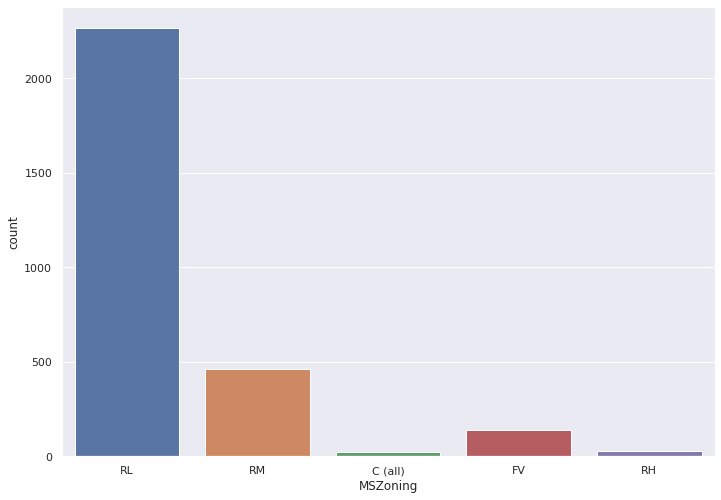

In [16]:
sns.countplot(x=df["MSZoning"])

In [17]:
df["MSZoning"].value_counts(dropna=False)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

In [18]:
df["MSZoning"].fillna("RL", inplace=True)
df["MSZoning"] = le.fit_transform(df["MSZoning"])

## LotFrontage (Линейные метры улицы, соединенной с недвижимостью)

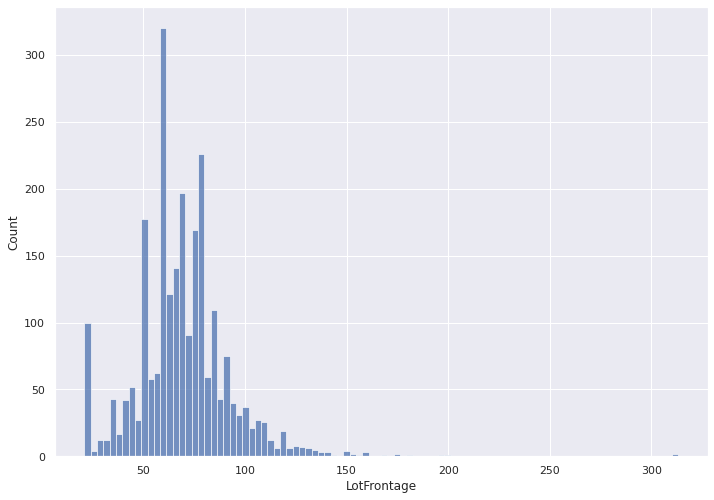

In [19]:
sns.histplot(x=df["LotFrontage"])

In [20]:
df["LotFrontage"].isna().sum() / len(df)

0.16649537512846865

In [21]:
df[df["LotFrontage"].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,5,3,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
13,0,3,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737.0,Unf,0.0,175.0,912.0,GasA,TA,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1.0,352.0,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000.0
15,0,3,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733.0,Unf,0.0,520.0,1253.0,GasA,TA,Y,SBrkr,1253,0,0,1253,1.0,0.0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1.0,352.0,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000.0
17,0,3,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578.0,Unf,0.0,426.0,1004.0,GasA,Ex,Y,SBrkr,1004,0,0,1004,1.0,0.0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000.0
25,0,3,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188.0,ALQ,668.0,204.0,1060.0,GasA,Ex,Y,SBrkr,1060,0,0,1060,1.0,0.0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1.0,270.0,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,0,3,NaN,11088,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,Stucco,Stucco,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,872.0,Unf,0.0,476.0,1348.0,GasA,Ex,Y,SBrkr,1358,0,0,1358,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,2002.0,Unf,2.0,418.0,TA,TA,Y,68,166,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2851,5,3,NaN,21533,Pave,NaN,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Feedr,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1065.0,1065.0,GasA,Ex,Y,SBrkr,1065,984,0,2049,0.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1997.0,Unf,2.0,467.0,TA,TA,Y,120,48,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,NaN
2901,0,3,NaN,50102,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,6,5,1958,1958,Gable,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,909.0,Unf,0.0,723.0,1632.0,GasA,TA,Y,SBrkr,1650,0,0,1650,1.0,0.0,1,0,2,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,2.0,518.0,TA,TA,Y,0,0,0,0,138,0,NaN,NaN,NaN,0,3,2006,WD,Alloca,NaN


In [22]:
df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace=True)

## LotArea (Размер лота в квадратных футах)

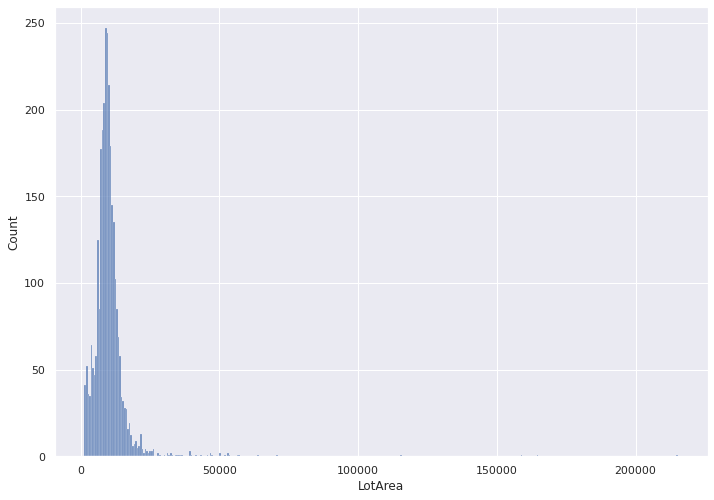

In [23]:
sns.histplot(x=df["LotArea"])

In [24]:
df["LotArea"].isna().sum() / len(df)

0.0

## Street (Тип подъездной дороги)

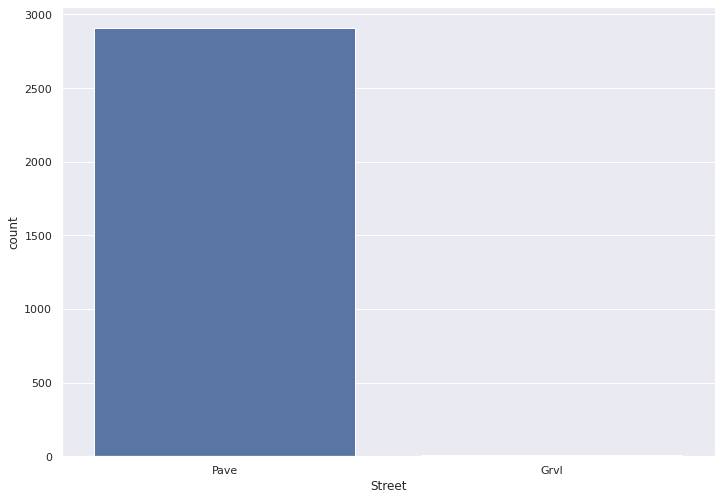

In [25]:
sns.countplot(x=df["Street"])

In [26]:
df["Street"].value_counts(dropna=False)

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [27]:
df["Street"] = le.fit_transform(df["Street"])

## Alley (Тип подъезда к аллее)

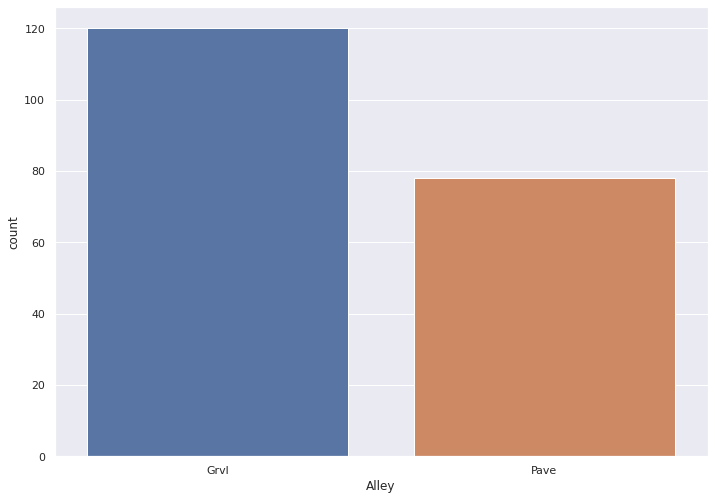

In [28]:
sns.countplot(x=df["Alley"])

In [29]:
df["Alley"].value_counts(dropna=False)

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [30]:
df["Alley"] = le.fit_transform(df["Alley"])

## LotShape (Общий вид собственности)

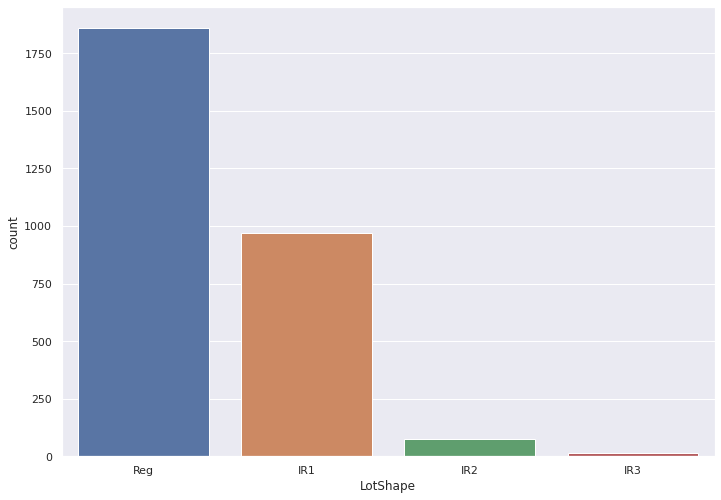

In [31]:
sns.countplot(x=df["LotShape"])

In [32]:
df["LotShape"].value_counts(dropna=False)

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [33]:
df["LotShape"] = le.fit_transform(df["LotShape"])

## LandContour (Плоскостность объекта недвижимости)

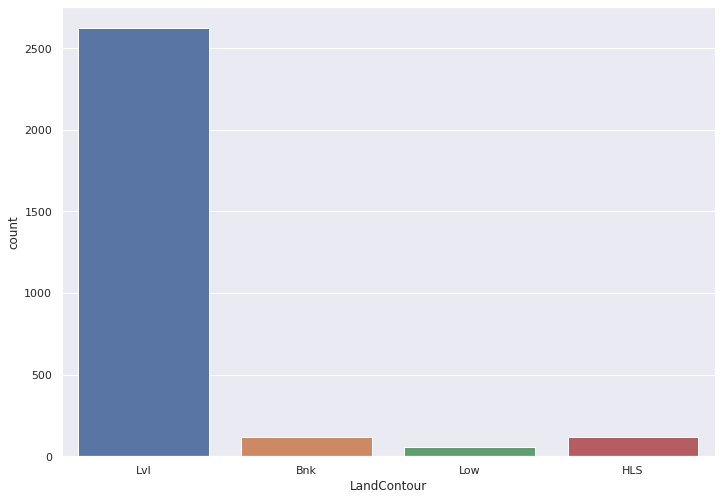

In [34]:
sns.countplot(x=df["LandContour"])

In [35]:
df["LandContour"].value_counts(dropna=False)

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

In [36]:
df["LandContour"] = le.fit_transform(df["LandContour"])

## Utilities (Тип доступных коммунальных услуг)

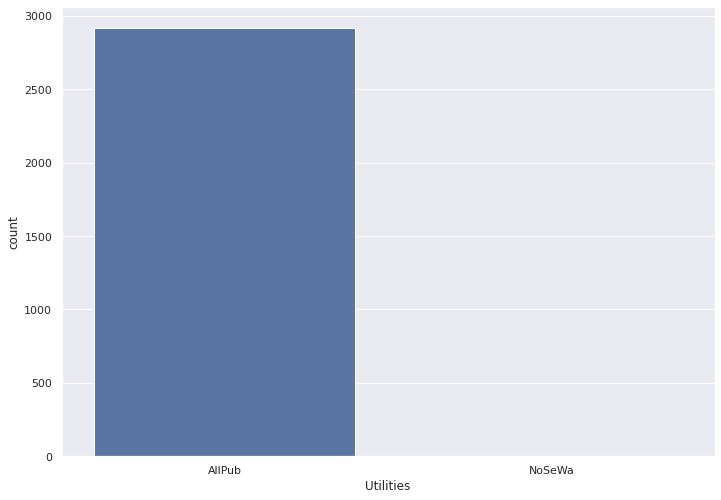

In [37]:
sns.countplot(x=df["Utilities"])

In [38]:
df["Utilities"].value_counts(dropna=False)

AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

In [39]:
df["Utilities"] = le.fit_transform(df["Utilities"])

## LotConfig (Конфигурация лота)

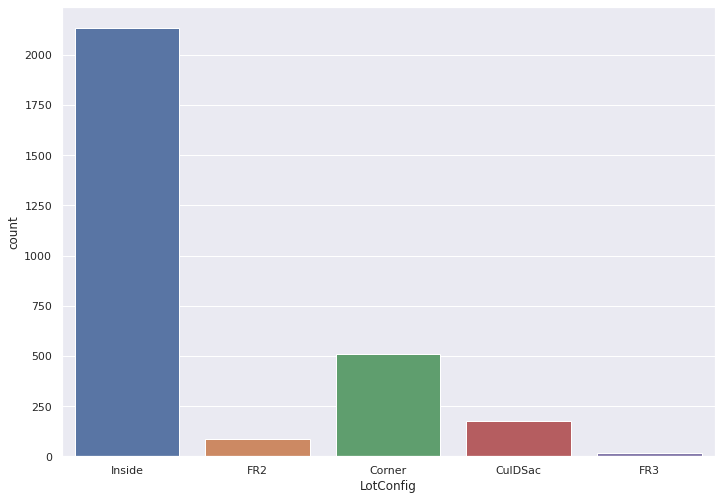

In [40]:
sns.countplot(x=df["LotConfig"])

In [41]:
df["LotConfig"].value_counts(dropna=False)

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [42]:
df["LotConfig"] = le.fit_transform(df["LotConfig"])

## LandSlope (Наклон собственности)

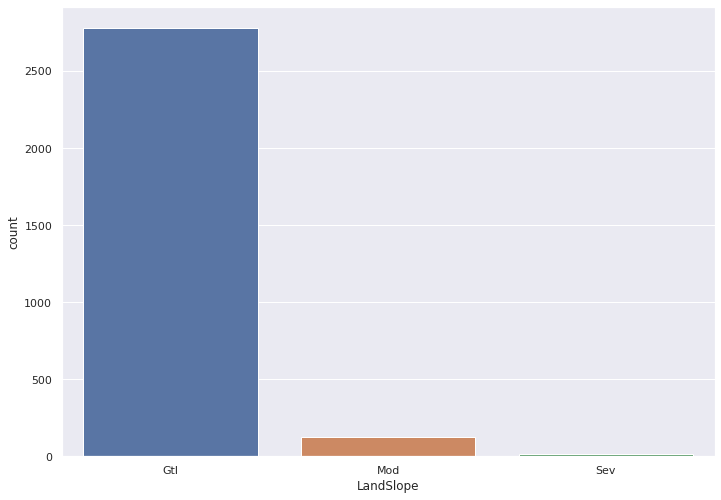

In [43]:
sns.countplot(x=df["LandSlope"])

In [44]:
df["LandSlope"].value_counts(dropna=False)

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

In [45]:
df["LandSlope"] = le.fit_transform(df["LandSlope"])

## Neighborhood (Физические местоположения в пределах города Эймс)

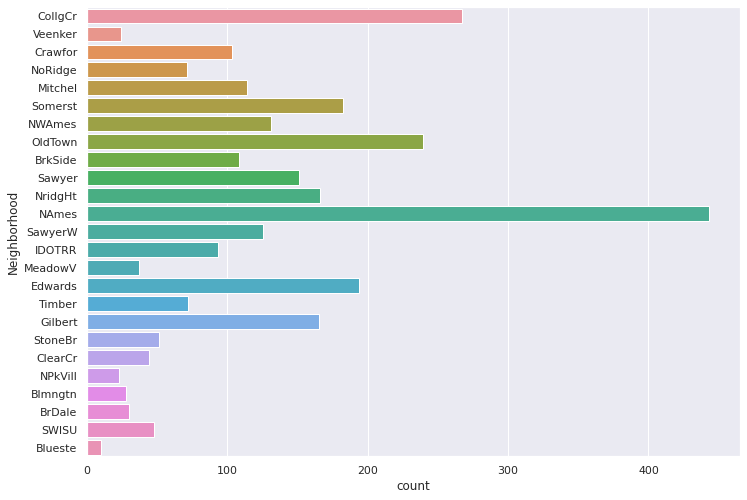

In [46]:
sns.countplot(y=df["Neighborhood"])

In [47]:
df["Neighborhood"].value_counts(dropna=False)

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [48]:
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])

## Condition1 (Близость к главной дороге или железной дороге)

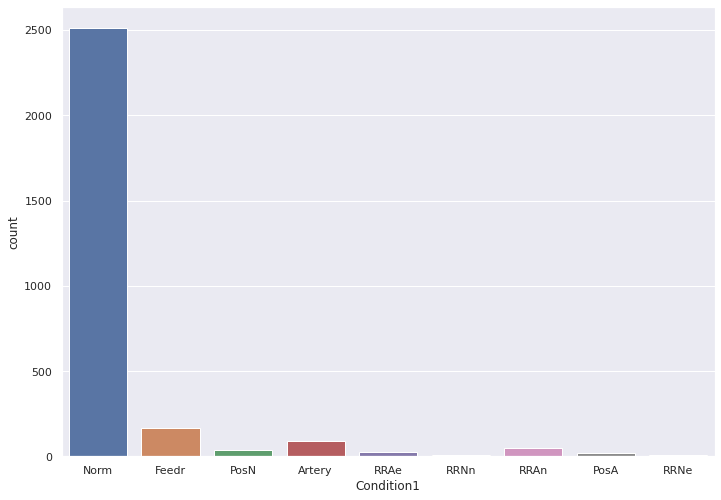

In [49]:
sns.countplot(x=df["Condition1"])

In [50]:
df["Condition1"].value_counts(dropna=False)

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

In [51]:
df["Condition1"] = le.fit_transform(df["Condition1"])

## Condition2 (Близость к главной дороге или железной дороге, при наличии второй)

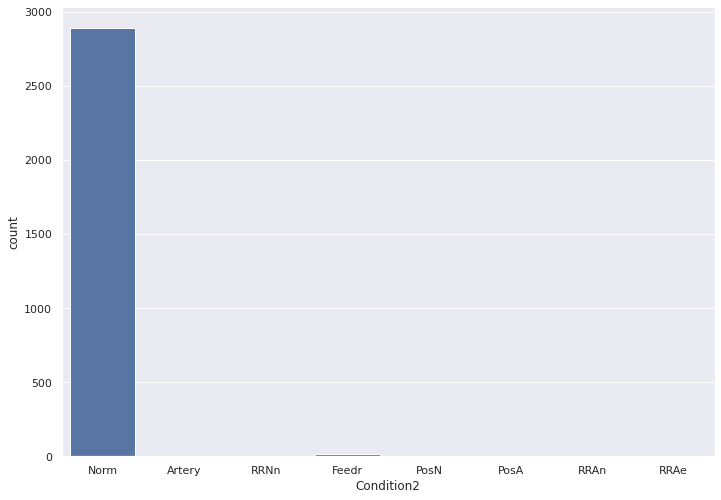

In [52]:
sns.countplot(x=df["Condition2"])

In [53]:
df["Condition2"].value_counts(dropna=False)

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [54]:
df["Condition2"] = le.fit_transform(df["Condition2"])

## BldgType (Тип жилья)

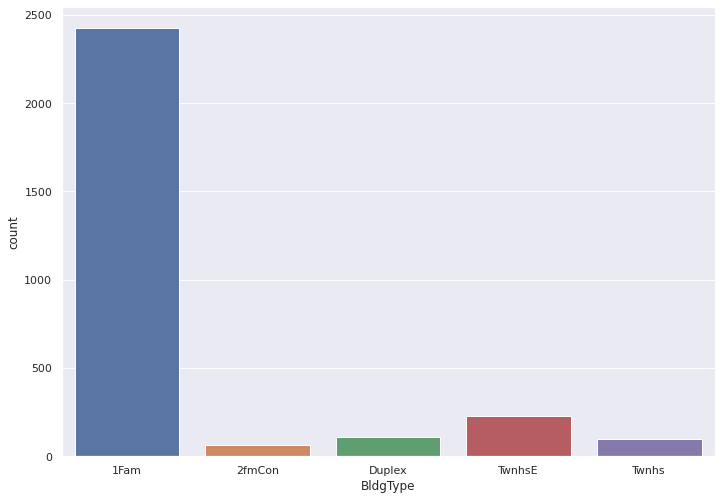

In [55]:
sns.countplot(x=df["BldgType"])

In [56]:
df["BldgType"].value_counts(dropna=False)

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [57]:
df["BldgType"] = le.fit_transform(df["BldgType"])

## HouseStyle (Стиль жилья)

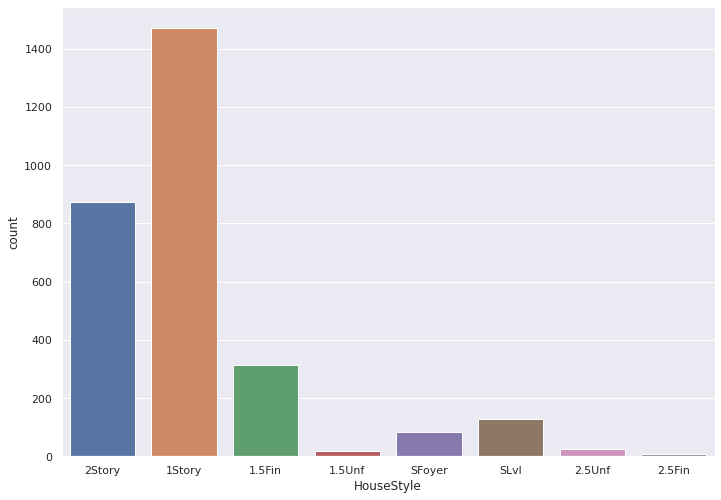

In [58]:
sns.countplot(x=df["HouseStyle"])

In [59]:
df["HouseStyle"].value_counts(dropna=False)

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [60]:
df["HouseStyle"] = le.fit_transform(df["HouseStyle"])

## OverallQual (Общее качество материала и отделки)

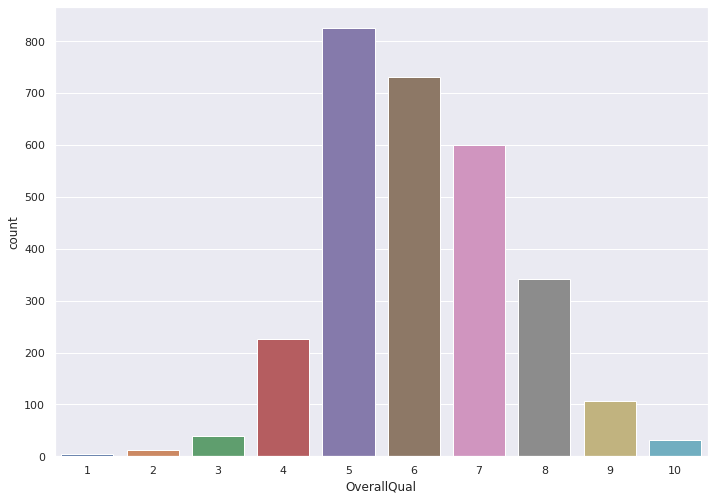

In [61]:
sns.countplot(x=df["OverallQual"])

In [62]:
df["OverallQual"].value_counts(dropna=False)

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

## OverallCond (Общая оценка состояния)

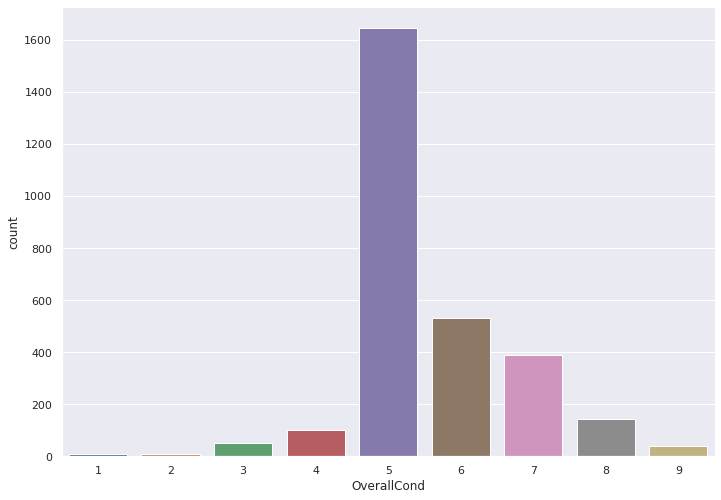

In [63]:
sns.countplot(x=df["OverallCond"])

In [64]:
df["OverallCond"].value_counts(dropna=False)

5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

## YearBuilt (Первоначальная дата строительства)

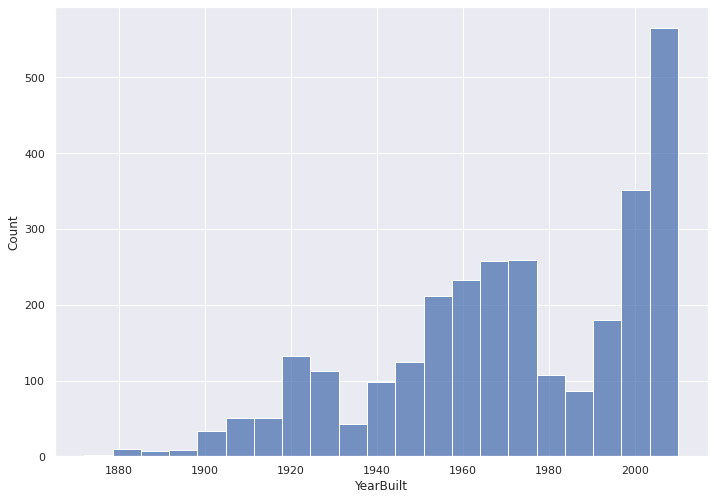

In [65]:
sns.histplot(x=df["YearBuilt"])

In [66]:
df["YearBuilt"].isna().sum() / len(df)

0.0

In [67]:
df["YearBuilt"] = le.fit_transform(df["YearBuilt"])

## YearRemodAdd (Дата реконструкции)

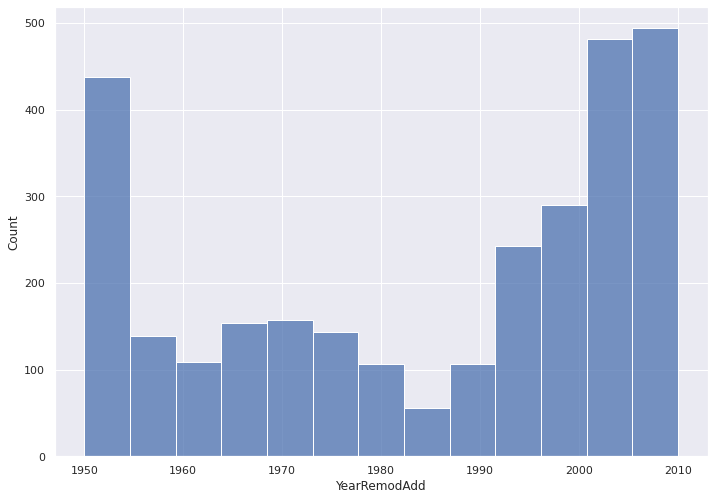

In [68]:
sns.histplot(x=df["YearRemodAdd"])

In [69]:
df["YearRemodAdd"].isna().sum() / len(df)

0.0

In [70]:
df["YearRemodAdd"] = le.fit_transform(df["YearRemodAdd"])

## RoofStyle (Тип кровли)

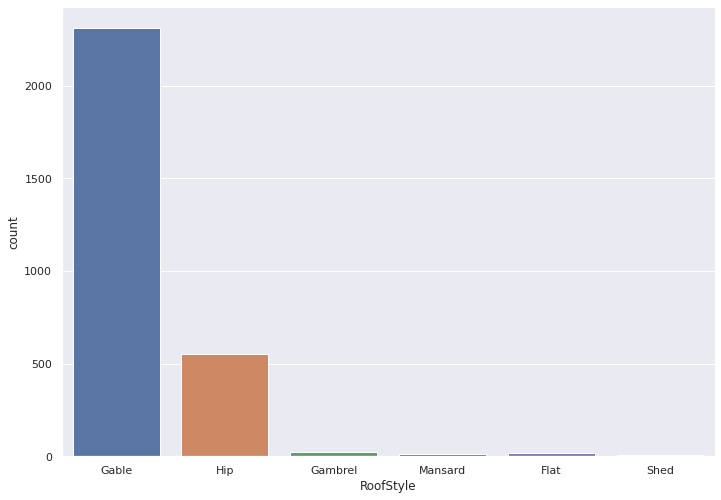

In [71]:
sns.countplot(x=df["RoofStyle"])

In [72]:
df["RoofStyle"].value_counts(dropna=False)

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

In [73]:
df["RoofStyle"] = le.fit_transform(df["RoofStyle"])

## RoofMatl (Материал крыши)

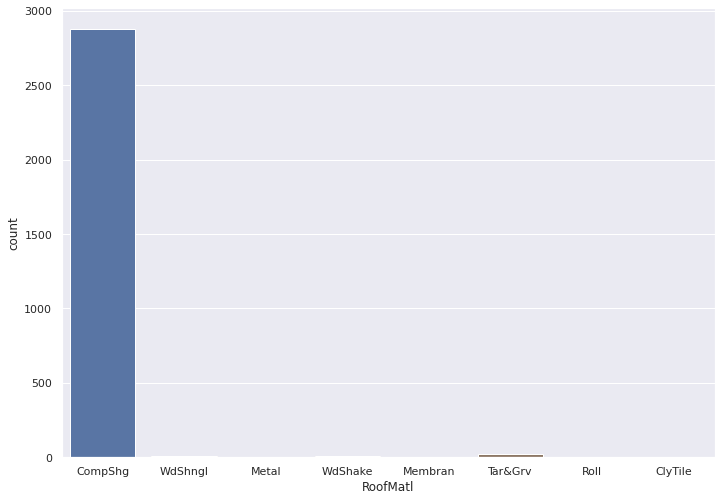

In [74]:
sns.countplot(x=df["RoofMatl"])

In [75]:
df["RoofMatl"].value_counts(dropna=False)

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Roll          1
Metal         1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64

In [76]:
df["RoofMatl"] = le.fit_transform(df["RoofMatl"])

## Exterior1st (Наружное покрытие дома)

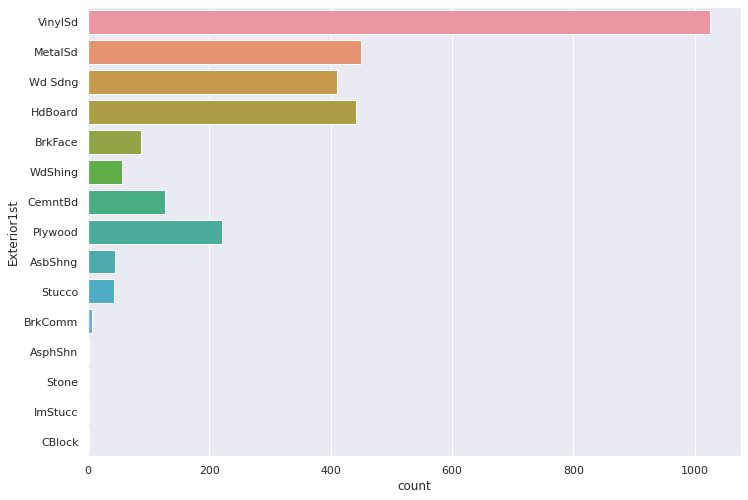

In [77]:
sns.countplot(y=df["Exterior1st"])

In [78]:
df["Exterior1st"].value_counts(dropna=False)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
AsphShn       2
Stone         2
ImStucc       1
NaN           1
Name: Exterior1st, dtype: int64

In [79]:
df["Exterior1st"].fillna("VinylSd", inplace=True)
df["Exterior1st"] = le.fit_transform(df["Exterior1st"])

## Exterior2nd (Наружное покрытие дома, если более одного материала)

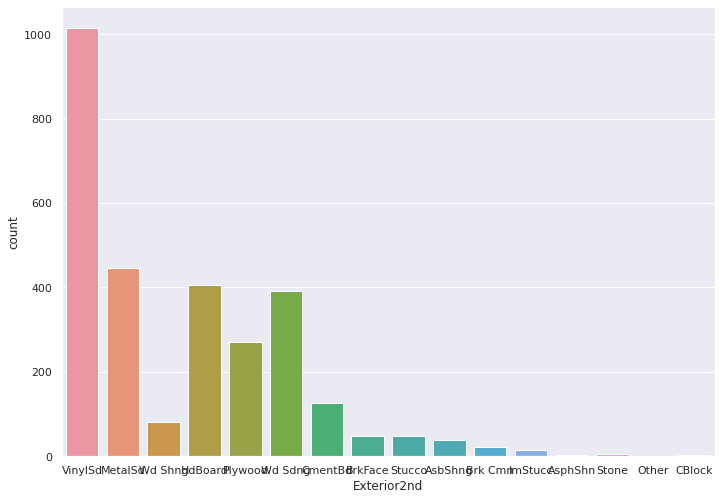

In [80]:
sns.countplot(x=df["Exterior2nd"])

In [81]:
df["Exterior2nd"].value_counts(dropna=False)

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64

In [82]:
df["Exterior2nd"].fillna("VinylSd", inplace=True)
df["Exterior2nd"] = le.fit_transform(df["Exterior2nd"])

## MasVnrType (Тип облицовки кладки)

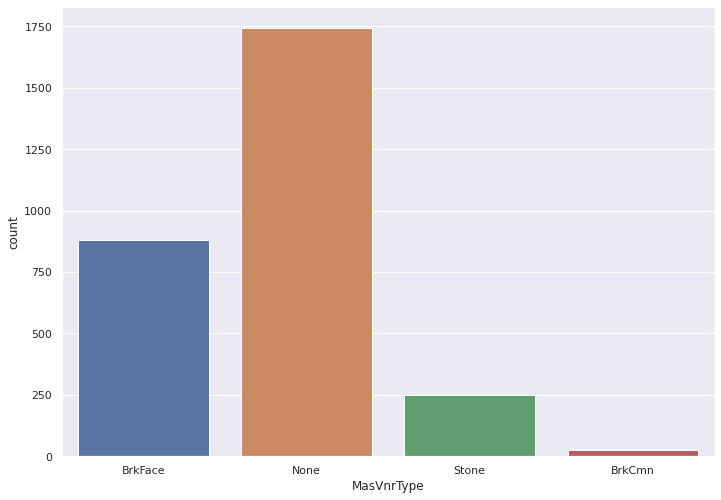

In [83]:
sns.countplot(x=df["MasVnrType"])

In [84]:
df["MasVnrType"].value_counts(dropna=False)

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

In [85]:
df["MasVnrType"].fillna("NA", inplace=True)
df["MasVnrType"] = le.fit_transform(df["MasVnrType"])

## MasVnrArea (Площадь облицовки кладки в квадратных футах)

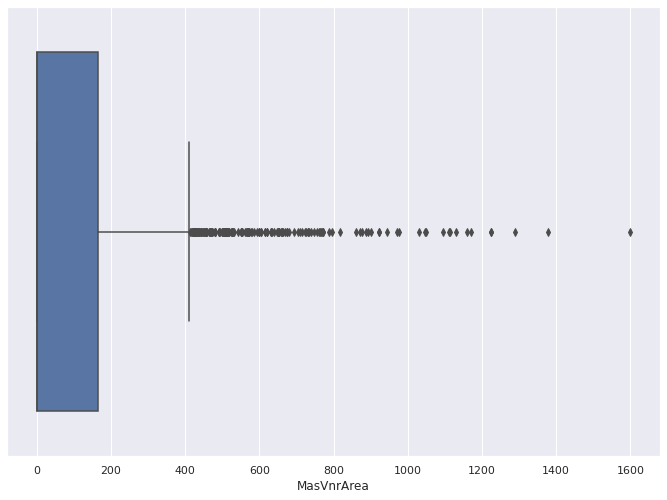

In [86]:
sns.boxplot(x=df["MasVnrArea"])

In [87]:
df["MasVnrArea"].isna().sum() / len(df)

0.0078794107571086

In [88]:
df["MasVnrArea"].fillna(df["MasVnrArea"].mean(), inplace=True)

## ExterQual (Качество наружных материалов)

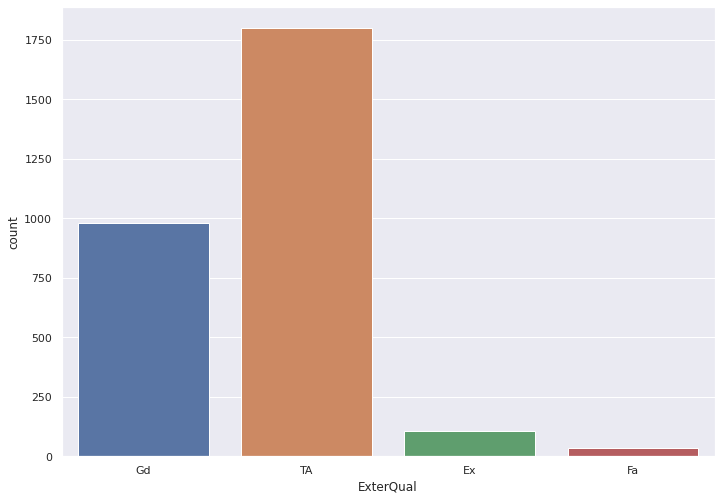

In [89]:
sns.countplot(x=df["ExterQual"])

In [90]:
df["ExterQual"].value_counts(dropna=False)

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [91]:
df["ExterQual"] = le.fit_transform(df["ExterQual"])

## ExterCond (Настоящее состояние материала на внешней стороне)

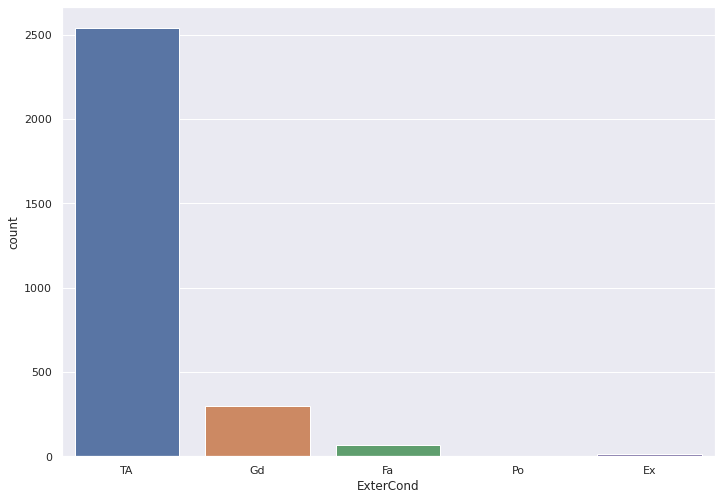

In [92]:
sns.countplot(x=df["ExterCond"])

In [93]:
df["ExterCond"].value_counts(dropna=False)

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [94]:
df["ExterCond"] = le.fit_transform(df["ExterCond"])

## Foundation (Тип фундамента)

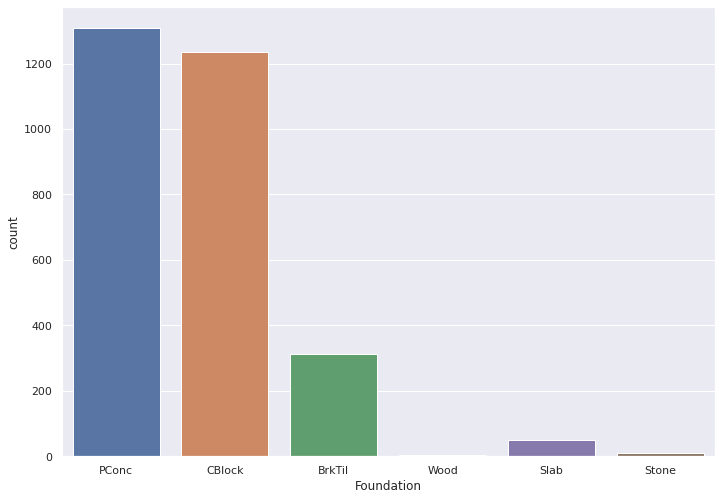

In [95]:
sns.countplot(x=df["Foundation"])

In [96]:
df["Foundation"].value_counts(dropna=False)

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [97]:
df["Foundation"] = le.fit_transform(df["Foundation"])

## BsmtQual (Высота подвала)

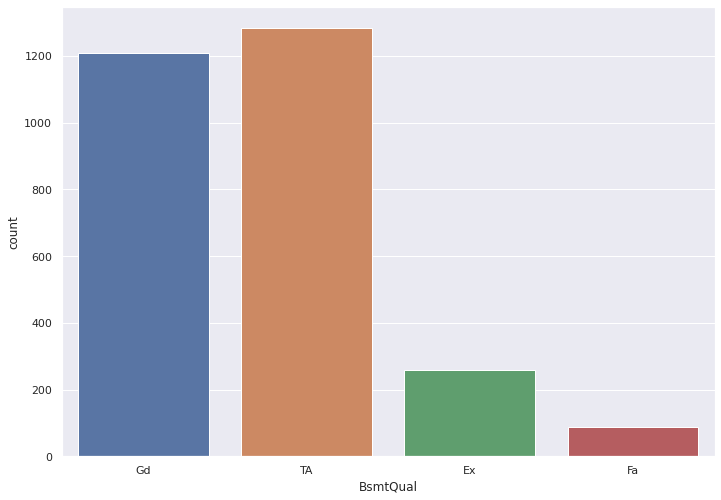

In [98]:
sns.countplot(x=df["BsmtQual"])

In [99]:
df["BsmtQual"].value_counts(dropna=False)

TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64

In [100]:
df["BsmtQual"].fillna("NA", inplace=True)
df["BsmtQual"] = le.fit_transform(df["BsmtQual"])

## BsmtCond (Общее состояние подвала)

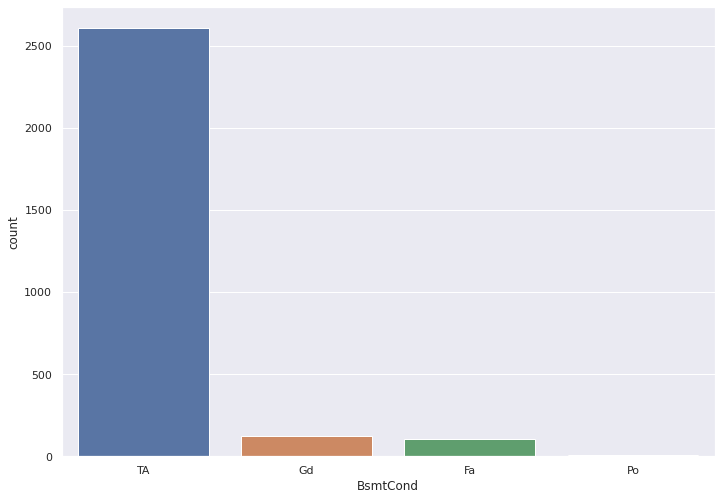

In [101]:
sns.countplot(x=df["BsmtCond"])

In [102]:
df["BsmtCond"].value_counts(dropna=False)

TA     2606
Gd      122
Fa      104
NaN      82
Po        5
Name: BsmtCond, dtype: int64

In [103]:
df["BsmtCond"].fillna("NA", inplace=True)
df["BsmtCond"] = le.fit_transform(df["BsmtCond"])

## BsmtExposure (Стены подвала на уровне пешеходной дорожки или сада)

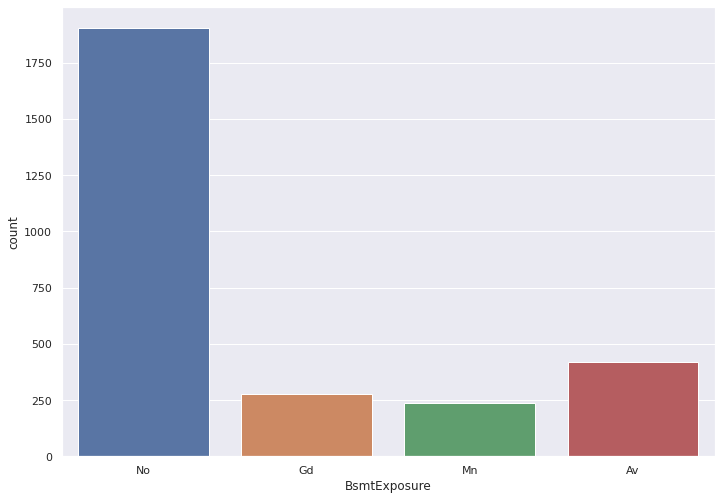

In [104]:
sns.countplot(x=df["BsmtExposure"])

In [105]:
df["BsmtExposure"].value_counts(dropna=False)

No     1904
Av      418
Gd      276
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64

In [106]:
df["BsmtExposure"].fillna("NA", inplace=True)
df["BsmtExposure"] = le.fit_transform(df["BsmtExposure"])

## BsmtFinType1 (Качество готовой площади подвала)

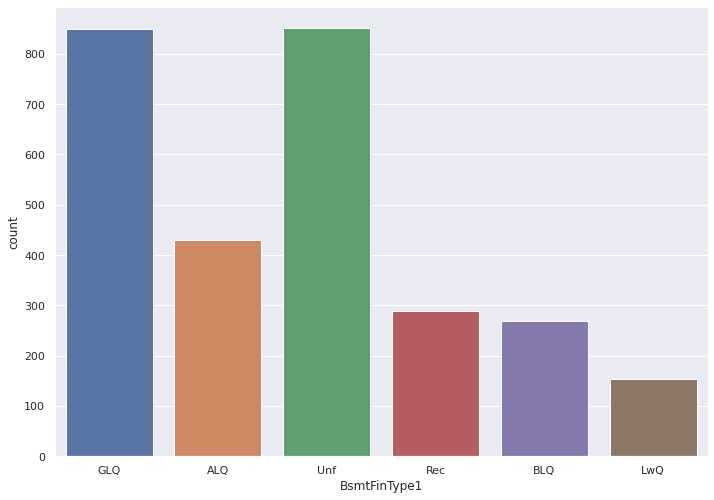

In [107]:
sns.countplot(x=df["BsmtFinType1"])

In [108]:
df["BsmtFinType1"].value_counts(dropna=False)

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     79
Name: BsmtFinType1, dtype: int64

In [109]:
df["BsmtFinType1"].fillna("NA", inplace=True)
df["BsmtFinType1"] = le.fit_transform(df["BsmtFinType1"])

## BsmtFinSF1 (Тип 1 готовые квадратные футы)

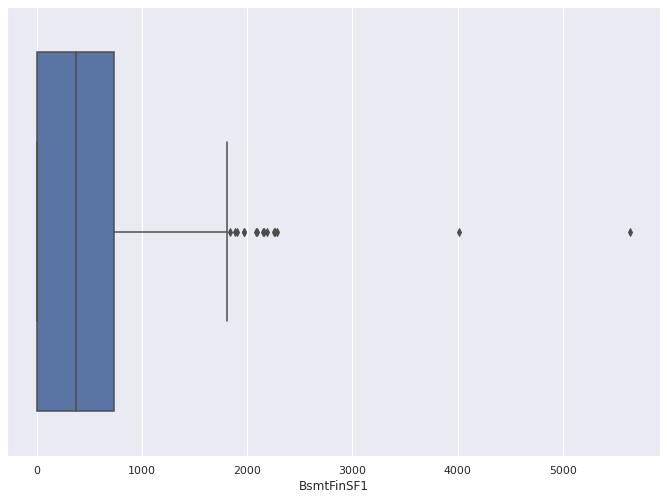

In [110]:
sns.boxplot(x=df["BsmtFinSF1"])

In [111]:
df["BsmtFinSF1"].isna().sum() / len(df)

0.00034258307639602604

In [112]:
df["BsmtFinSF1"].fillna(0, inplace=True)

## BsmtFinType2 (Качество второй готовой площади (при наличии))

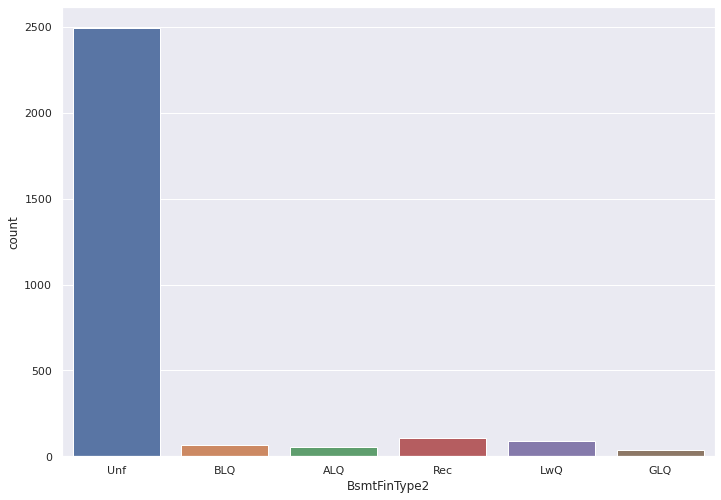

In [113]:
sns.countplot(x=df["BsmtFinType2"])

In [114]:
df["BsmtFinType2"].value_counts(dropna=False)

Unf    2493
Rec     105
LwQ      87
NaN      80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [115]:
df["BsmtFinType2"].fillna("NA", inplace=True)
df["BsmtFinType2"] = le.fit_transform(df["BsmtFinType2"])

## BsmtFinSF2 (Тип 2 готовые квадратные футы)

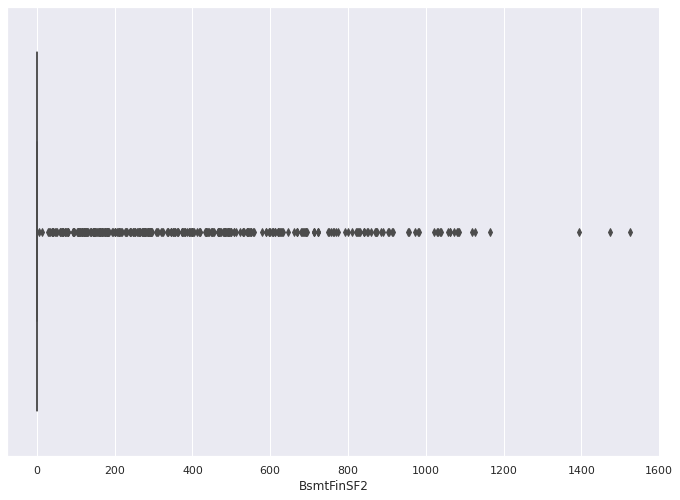

In [116]:
sns.boxplot(x=df["BsmtFinSF2"])

In [117]:
df["BsmtFinSF2"].isna().sum() / len(df)

0.00034258307639602604

In [118]:
df["BsmtFinSF2"].fillna(0, inplace=True)

## BsmtUnfSF (Недостроенные квадратные метры подвальной площади)

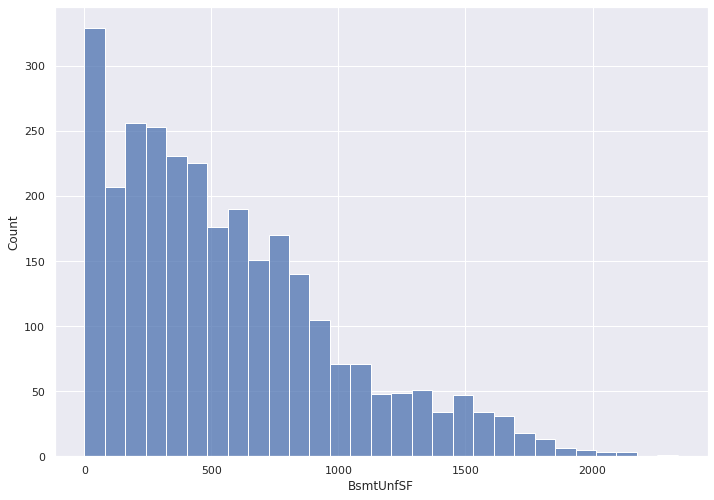

In [119]:
sns.histplot(x=df["BsmtUnfSF"])

In [120]:
df["BsmtUnfSF"].isna().sum() / len(df)

0.00034258307639602604

In [121]:
df["BsmtUnfSF"].fillna(0, inplace=True)

## TotalBsmtSF (Общая площадь подвала в квадратных футах)

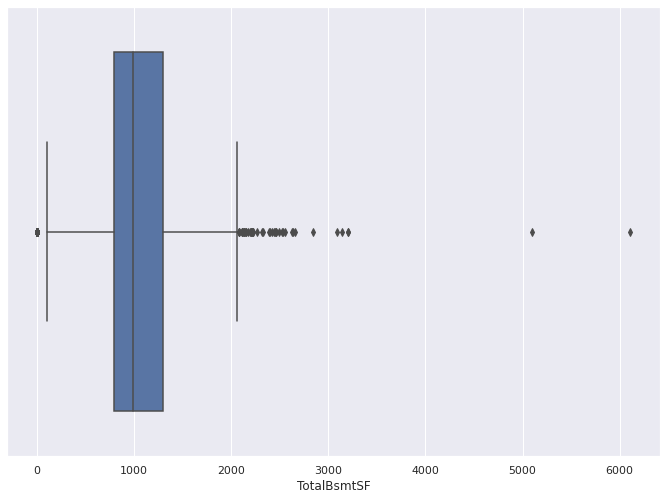

In [122]:
sns.boxplot(x=df["TotalBsmtSF"])

In [123]:
df["TotalBsmtSF"].isna().sum() / len(df)

0.00034258307639602604

In [124]:
df["TotalBsmtSF"].fillna(0, inplace=True)

In [125]:
df["BsmtSFExt"] = (df["TotalBsmtSF"] > 0).astype(int)

## Heating (Тип отопления)

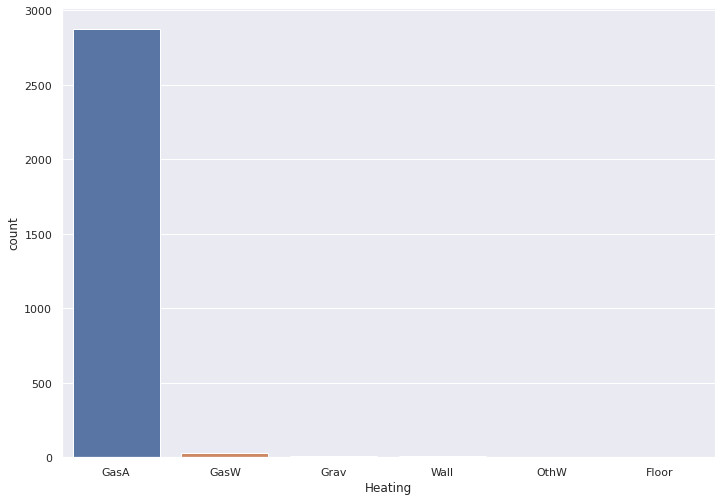

In [126]:
sns.countplot(x=df["Heating"])

In [127]:
df["Heating"].value_counts(dropna=False)

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [128]:
df["Heating"] = le.fit_transform(df["Heating"])

## HeatingQC (Качество и состояние отопления)

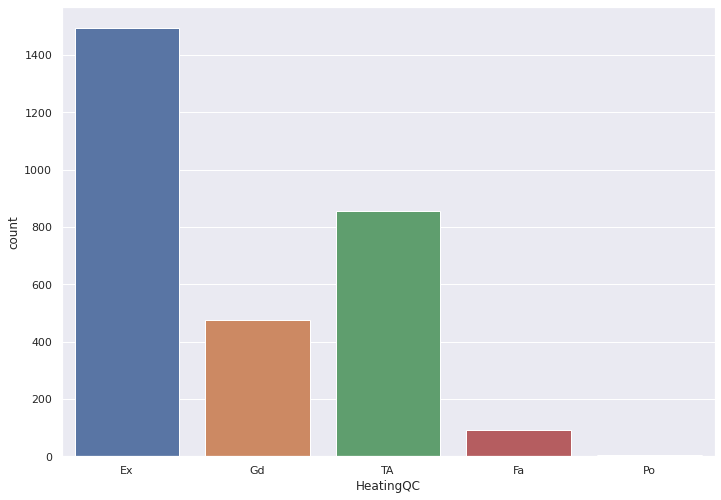

In [129]:
sns.countplot(x=df["HeatingQC"])

In [130]:
df["HeatingQC"].value_counts(dropna=False)

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

In [131]:
df["HeatingQC"] = le.fit_transform(df["HeatingQC"])

## CentralAir (Центральное кондиционирование воздуха)

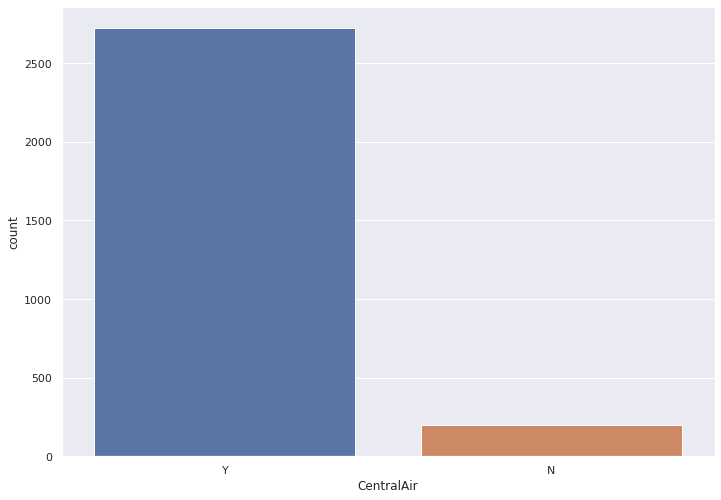

In [132]:
sns.countplot(x=df["CentralAir"])

In [133]:
df["CentralAir"].value_counts(dropna=False)

Y    2723
N     196
Name: CentralAir, dtype: int64

In [134]:
df["CentralAir"] = df["CentralAir"].replace({"Y": 1, "N": 0})

## Electrical (Электрическая система)

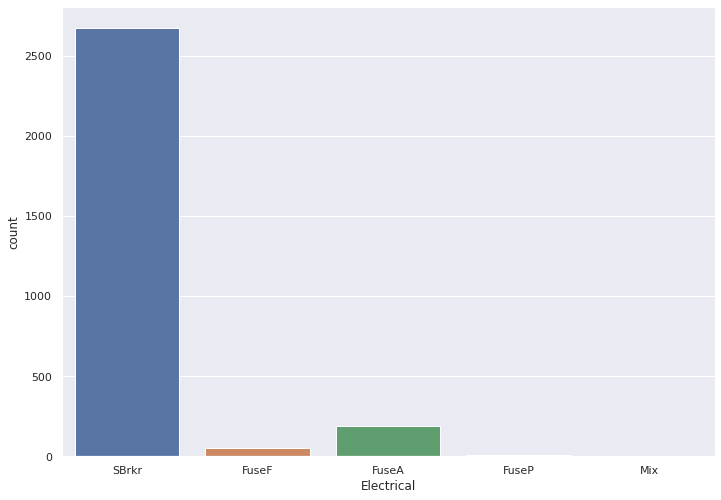

In [135]:
sns.countplot(x=df["Electrical"])

In [136]:
df["Electrical"].value_counts(dropna=False)

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [137]:
df["Electrical"].fillna("SBrkr", inplace=True)
df["Electrical"] = le.fit_transform(df["Electrical"])

## 1stFlrSF (Первый этаж квадратных футов)

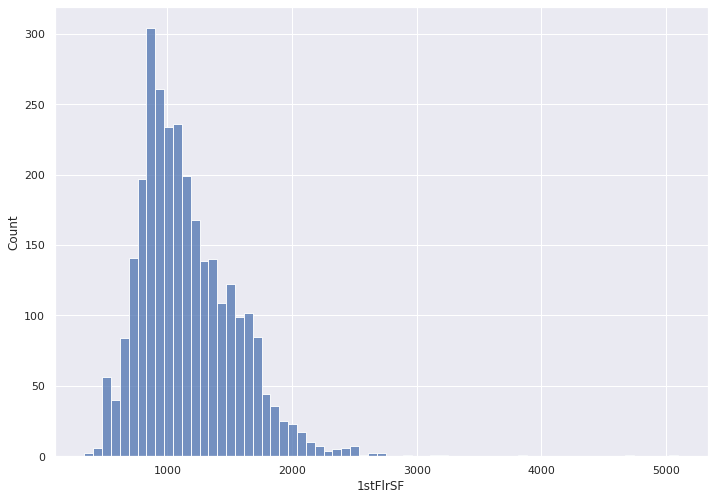

In [138]:
sns.histplot(x=df["1stFlrSF"])

In [139]:
df["1stFlrSF"].isna().sum() / len(df)

0.0

## 2ndFlrSF (Второй этаж квадратных футов)

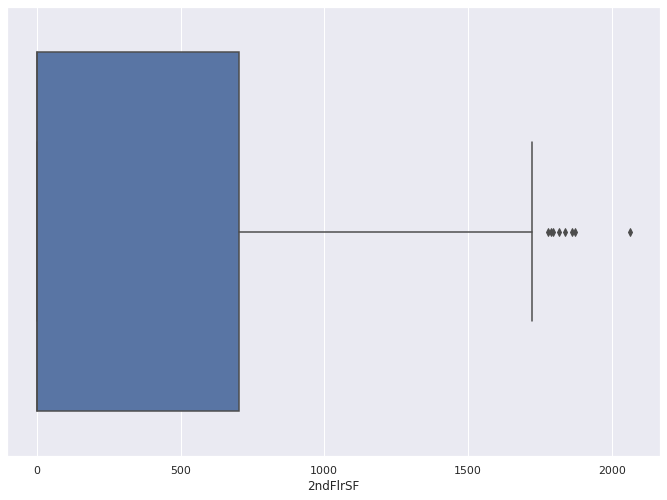

In [140]:
sns.boxplot(x=df["2ndFlrSF"])

In [141]:
df["2ndFlrSF"].isna().sum() / len(df)

0.0

In [142]:
df["2ndFlrExt"] = (df["2ndFlrSF"] > 0).astype(int)

## LowQualFinSF (Низкое качество отделки квадратных футов, все этажи)

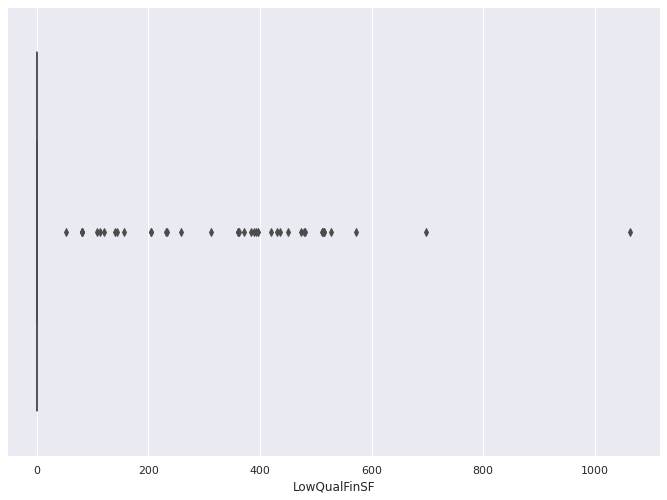

In [143]:
sns.boxplot(x=df["LowQualFinSF"])

In [144]:
df["LowQualFinSF"].isna().sum() / len(df)

0.0

## GrLivArea (Над классом, земля, жилая площадь квадратных футов)

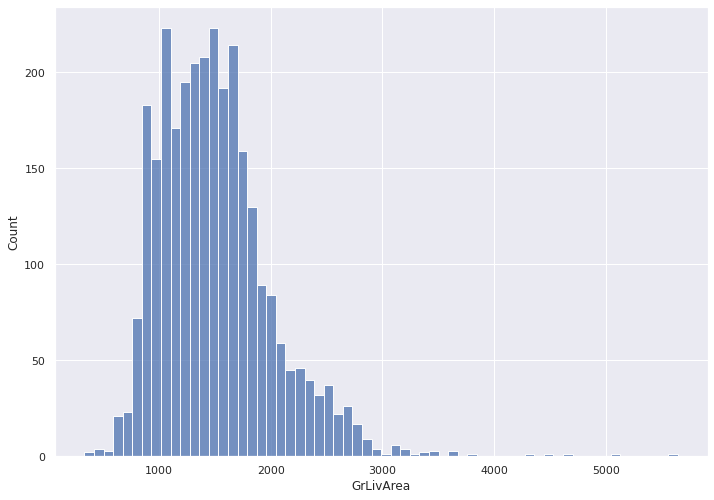

In [145]:
sns.histplot(x=df["GrLivArea"])

In [146]:
df["GrLivArea"].isna().sum() / len(df)

0.0

## BsmtFullBath (Подвал полностью оборудованные ванные комнаты)

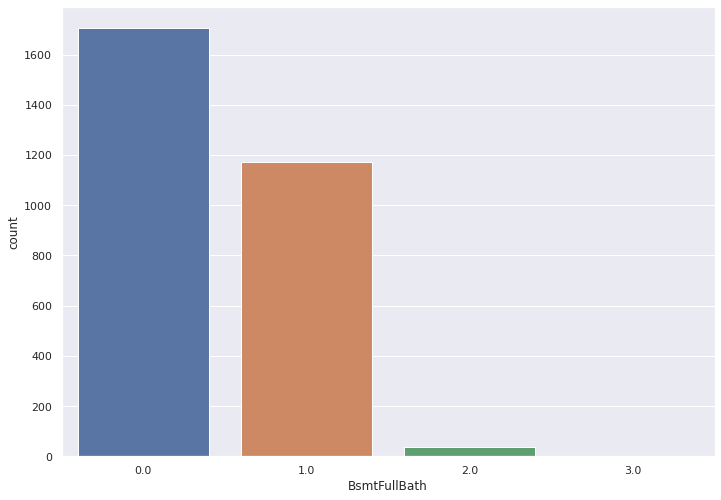

In [147]:
sns.countplot(x=df["BsmtFullBath"])

In [148]:
df["BsmtFullBath"].value_counts(dropna=False)

0.0    1705
1.0    1172
2.0      38
NaN       2
3.0       2
Name: BsmtFullBath, dtype: int64

In [149]:
df["BsmtFullBath"].fillna(0, inplace=True)
df["BsmtFullBath"] = df["BsmtFullBath"].astype(int)

## BsmtHalfBath (Подвал половина ванных комнат)

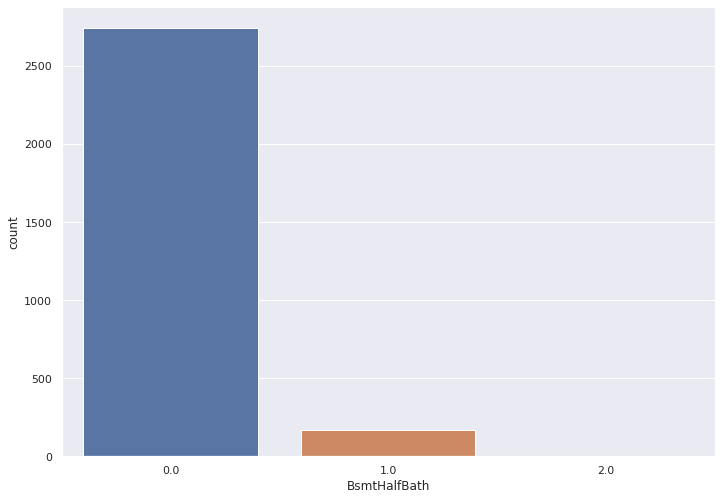

In [150]:
sns.countplot(x=df["BsmtHalfBath"])

In [151]:
df["BsmtHalfBath"].value_counts(dropna=False)

0.0    2742
1.0     171
2.0       4
NaN       2
Name: BsmtHalfBath, dtype: int64

In [152]:
df["BsmtHalfBath"].fillna(0, inplace=True)
df["BsmtHalfBath"] = df["BsmtHalfBath"].astype(int)

## FullBath (Полные ванные комнаты выше класса)

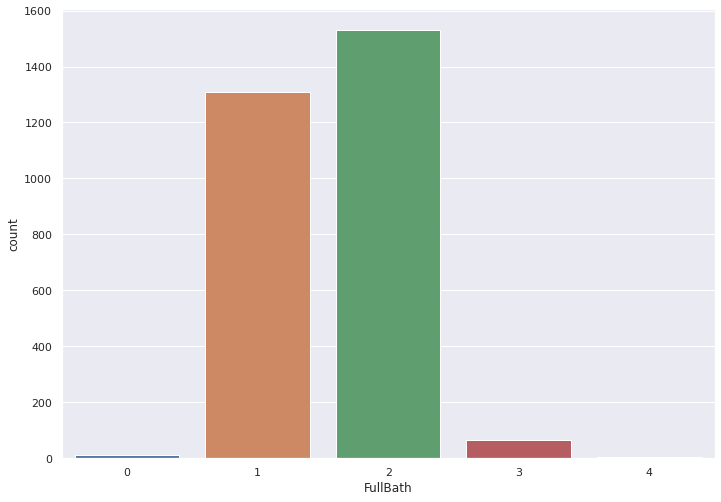

In [153]:
sns.countplot(x=df["FullBath"])

In [154]:
df["FullBath"].value_counts(dropna=False)

2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64

## HalfBath (Половина ванн выше класса)

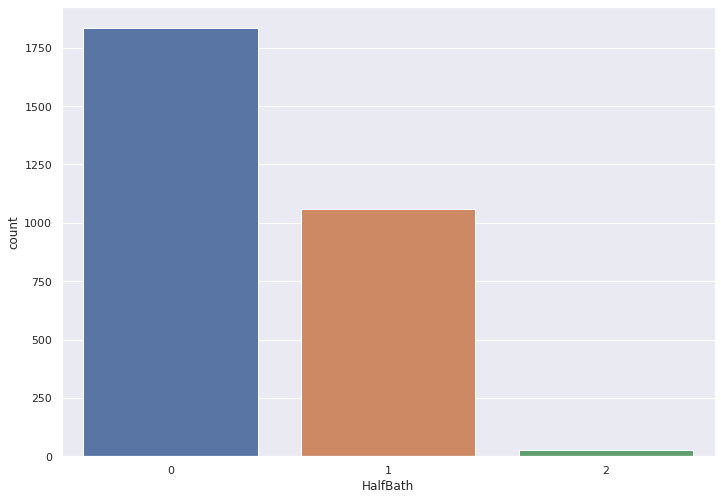

In [155]:
sns.countplot(x=df["HalfBath"])

In [156]:
df["HalfBath"].value_counts(dropna=False)

0    1834
1    1060
2      25
Name: HalfBath, dtype: int64

## BedroomAbvGr (Количество спален над цокольным этажом)

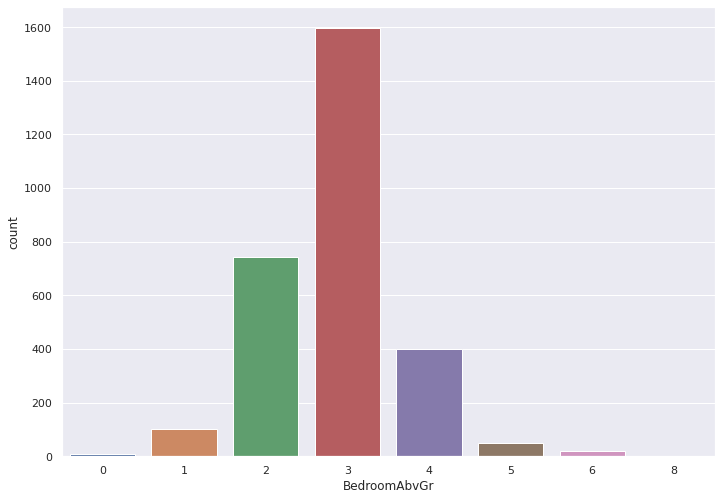

In [157]:
sns.countplot(x=df["BedroomAbvGr"])

In [158]:
df["BedroomAbvGr"].value_counts(dropna=False)

3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64

## KitchenAbvGr (Количество кухонь)

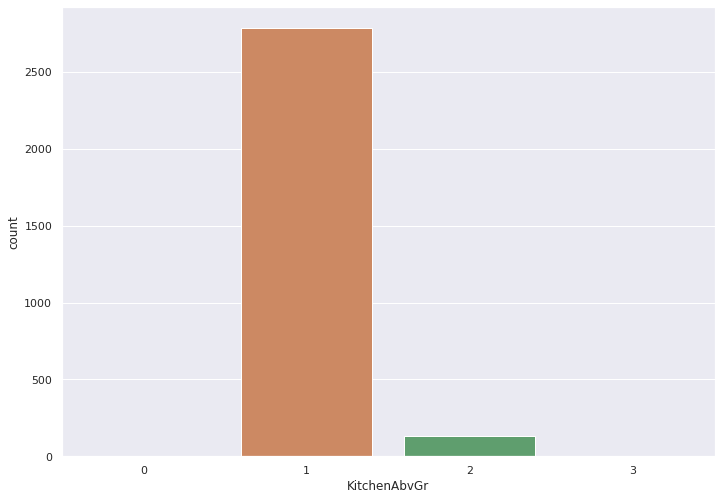

In [159]:
sns.countplot(x=df["KitchenAbvGr"])

In [160]:
df["KitchenAbvGr"].value_counts(dropna=False)

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

## KitchenQual (Качество кухни)

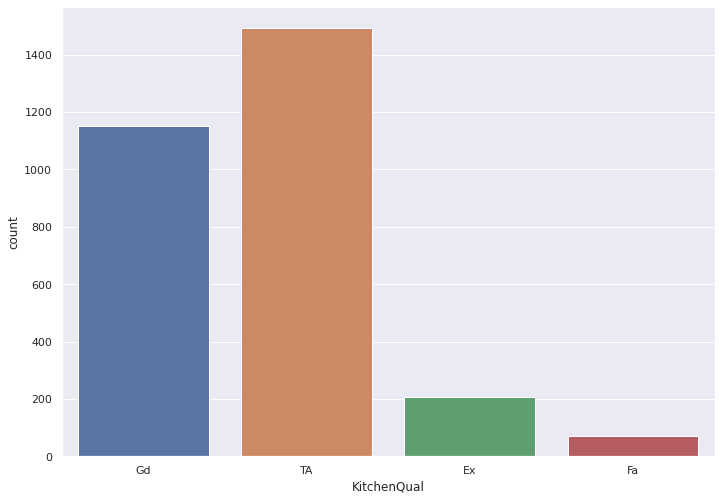

In [161]:
sns.countplot(x=df["KitchenQual"])

In [162]:
df["KitchenQual"].value_counts(dropna=False)

TA     1492
Gd     1151
Ex      205
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

In [163]:
df["KitchenQual"].fillna("TA", inplace=True)
df["KitchenQual"] = le.fit_transform(df["KitchenQual"])

## TotRmsAbvGrd (Всего номеров выше класса, не включает ванные комнаты)

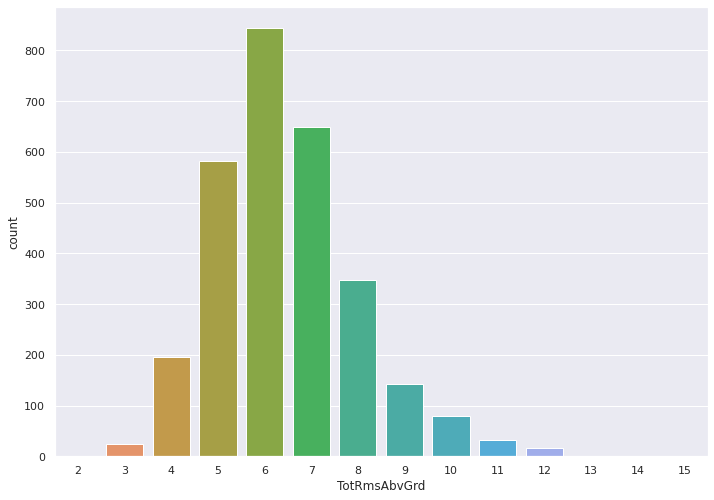

In [164]:
sns.countplot(x=df["TotRmsAbvGrd"])

In [165]:
df["TotRmsAbvGrd"].value_counts(dropna=False)

6     844
7     649
5     583
8     347
4     196
9     143
10     80
11     32
3      25
12     16
15      1
13      1
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

## Functional (Рейтинг домашней функциональности)

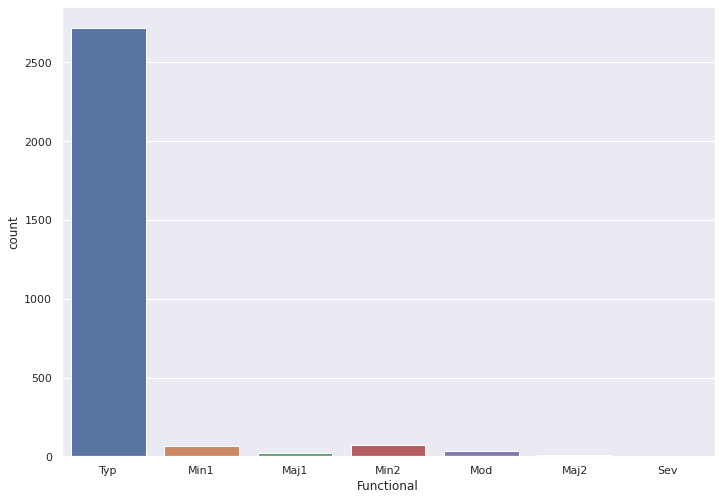

In [166]:
sns.countplot(x=df["Functional"])

In [167]:
df["Functional"].value_counts(dropna=False)

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64

In [168]:
df["Functional"].fillna("Typ", inplace=True)
df["Functional"] = le.fit_transform(df["Functional"])

## Fireplaces (Количество каминов)

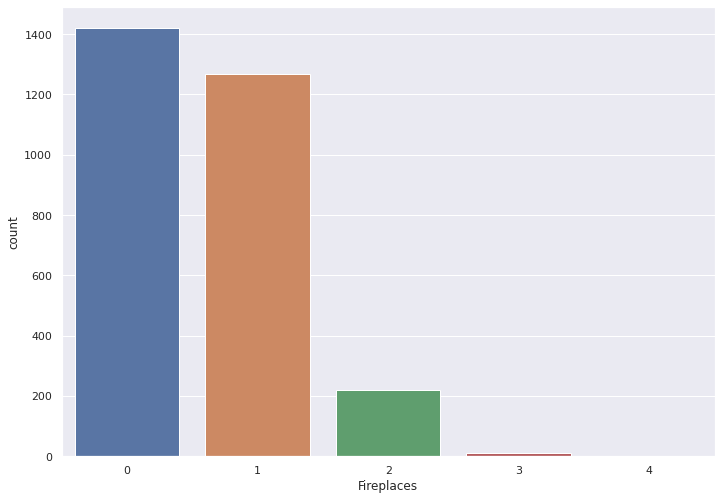

In [169]:
sns.countplot(x=df["Fireplaces"])

In [170]:
df["Fireplaces"].value_counts(dropna=False)

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

## FireplaceQu (Качество камина)

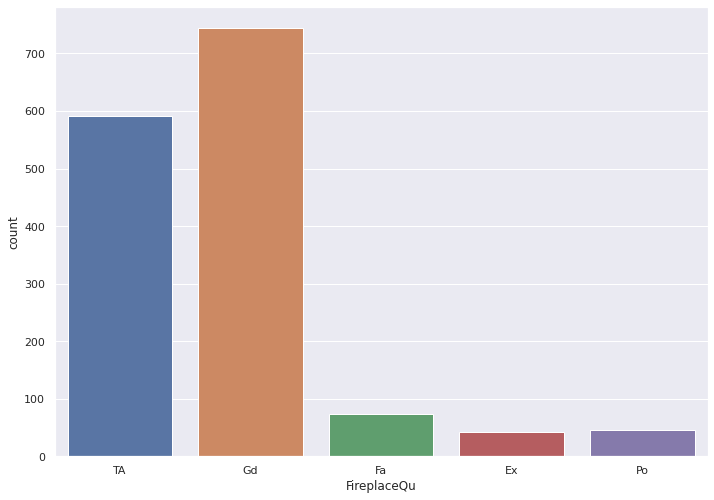

In [171]:
sns.countplot(x=df["FireplaceQu"])

In [172]:
df["FireplaceQu"].value_counts(dropna=False)

NaN    1420
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: FireplaceQu, dtype: int64

In [173]:
df["FireplaceQu"].fillna("NA", inplace=True)
df["FireplaceQu"] = le.fit_transform(df["FireplaceQu"])

## GarageType (Расположение гаража)

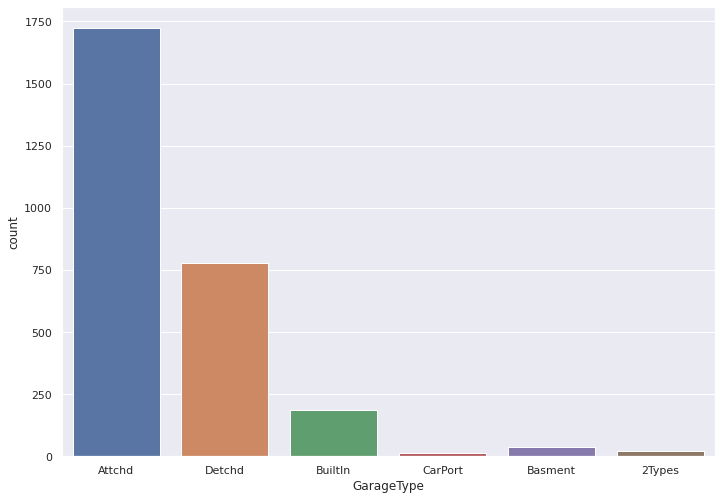

In [174]:
sns.countplot(x=df["GarageType"])

In [175]:
df["GarageType"].value_counts(dropna=False)

Attchd     1723
Detchd      779
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [176]:
df["GarageType"].fillna("NA", inplace=True)
df["GarageType"] = le.fit_transform(df["GarageType"])

## GarageYrBlt (Год постройки гаража)

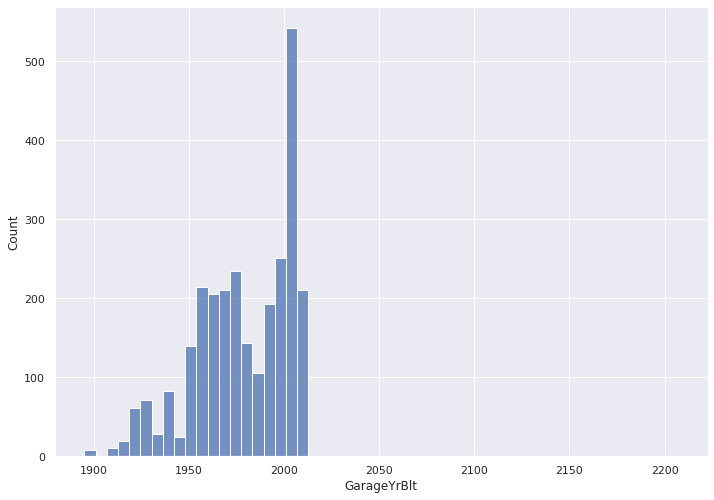

In [177]:
sns.histplot(x=df["GarageYrBlt"])

In [178]:
df["GarageYrBlt"].isna().sum() / len(df)

0.05447070914696814

In [179]:
df["GarageYrBlt"].fillna(0, inplace=True)
df["GarageYrBlt"] = df["GarageYrBlt"].astype(int)

In [180]:
df["GarageYrBlt"] = le.fit_transform(df["GarageYrBlt"])

## GarageFinish (Внутренняя отделка гаража)

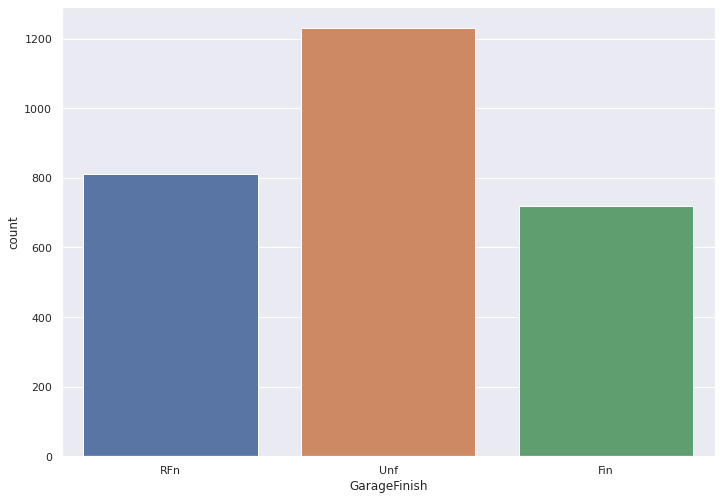

In [181]:
sns.countplot(x=df["GarageFinish"])

In [182]:
df["GarageFinish"].value_counts(dropna=False)

Unf    1230
RFn     811
Fin     719
NaN     159
Name: GarageFinish, dtype: int64

In [183]:
df["GarageFinish"].fillna("NA", inplace=True)
df["GarageFinish"] = le.fit_transform(df["GarageFinish"])

## GarageCars (Размер гаража в машиноместе)

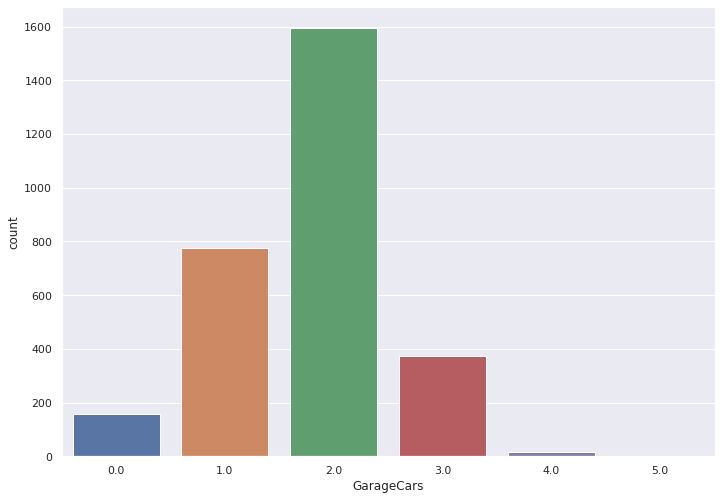

In [184]:
sns.countplot(x=df["GarageCars"])

In [185]:
df["GarageCars"].value_counts(dropna=False)

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
NaN       1
5.0       1
Name: GarageCars, dtype: int64

In [186]:
df["GarageCars"].fillna(.0, inplace=True)
df["GarageCars"] = df["GarageCars"].astype(int)

## GarageArea (Размер гаража в квадратных футах)

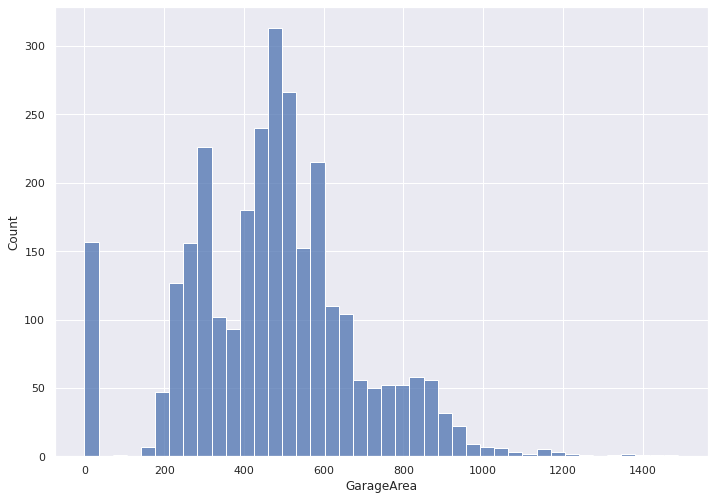

In [187]:
sns.histplot(x=df["GarageArea"])

In [188]:
df["GarageArea"].isna().sum() / len(df)

0.00034258307639602604

In [189]:
df["GarageArea"].fillna(0, inplace=True)

## GarageQual (Гаражное качество)

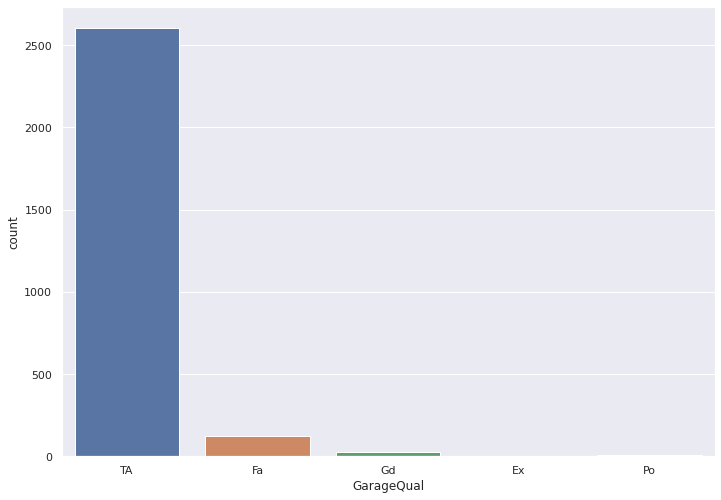

In [190]:
sns.countplot(x=df["GarageQual"])

In [191]:
df["GarageQual"].value_counts(dropna=False)

TA     2604
NaN     159
Fa      124
Gd       24
Po        5
Ex        3
Name: GarageQual, dtype: int64

In [192]:
df["GarageQual"].fillna("NA", inplace=True)
df["GarageQual"] = le.fit_transform(df["GarageQual"])

## GarageCond (Состояние гаража)

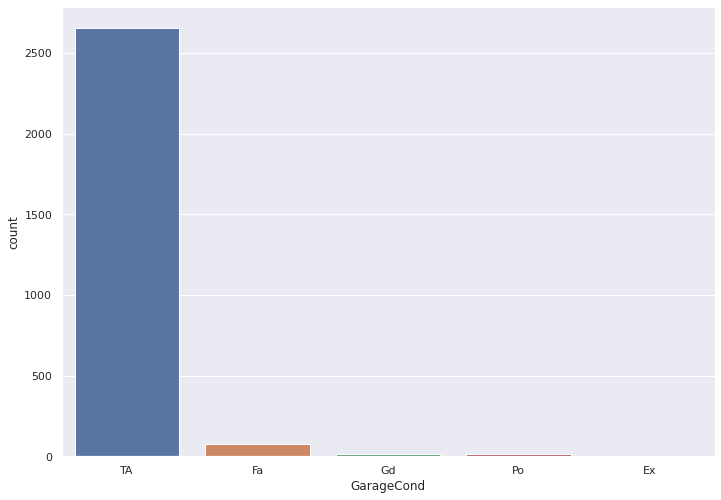

In [193]:
sns.countplot(x=df["GarageCond"])

In [194]:
df["GarageCond"].value_counts(dropna=False)

TA     2654
NaN     159
Fa       74
Gd       15
Po       14
Ex        3
Name: GarageCond, dtype: int64

In [195]:
df["GarageCond"].fillna("NA", inplace=True)
df["GarageCond"] = le.fit_transform(df["GarageCond"])

## PavedDrive (Асфальтированная подъездная дорожка)

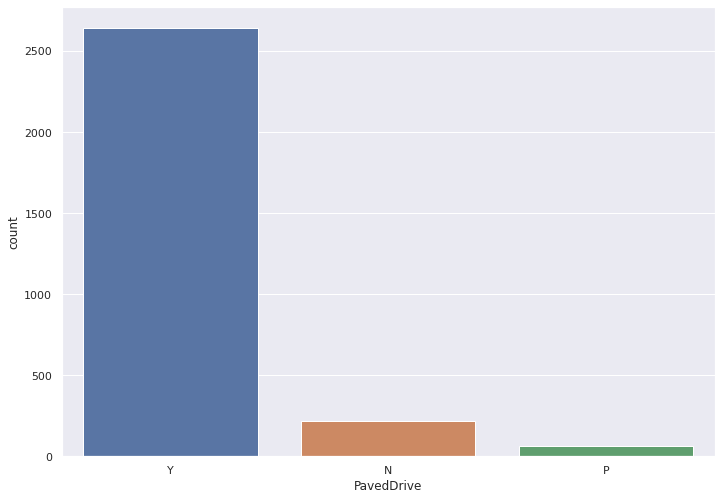

In [196]:
sns.countplot(x=df["PavedDrive"])

In [197]:
df["PavedDrive"].value_counts(dropna=False)

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

In [198]:
df["PavedDrive"] = le.fit_transform(df["PavedDrive"])

## WoodDeckSF (Площадь деревянной палубы в квадратных футах)

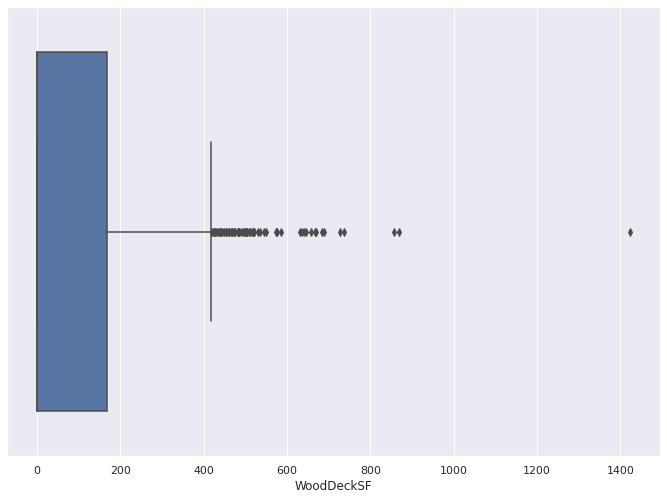

In [199]:
sns.boxplot(x=df["WoodDeckSF"])

In [200]:
df["WoodDeckSF"].isna().sum() / len(df)

0.0

## OpenPorchSF (Открытая площадь крыльца в квадратных футах)

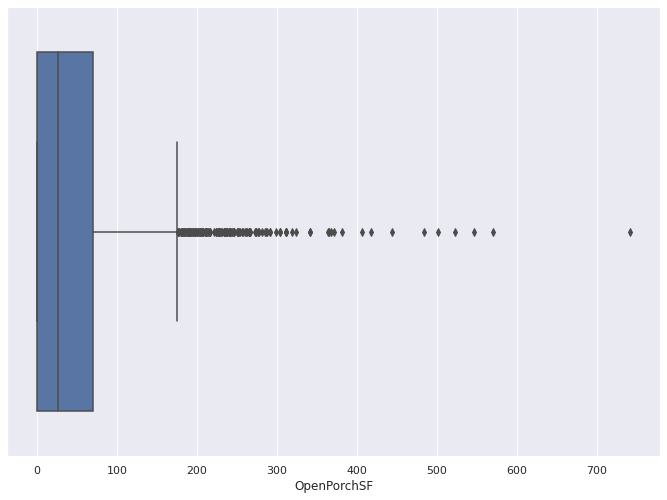

In [201]:
sns.boxplot(x=df["OpenPorchSF"])

In [202]:
df["OpenPorchSF"].isna().sum() / len(df)

0.0

## EnclosedPorch (Закрытая площадь крыльца в квадратных футах)

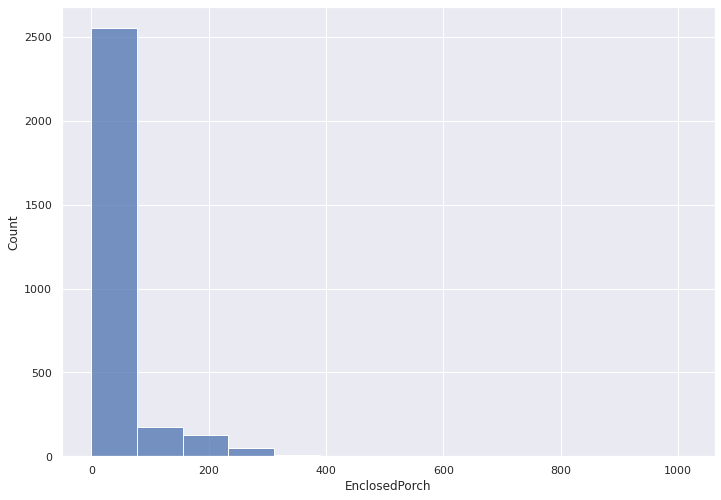

In [203]:
sns.histplot(x=df["EnclosedPorch"])

In [204]:
df["EnclosedPorch"].isna().sum() / len(df)

0.0

## 3SsnPorch (Площадь трехсезонного крыльца в квадратных футах)

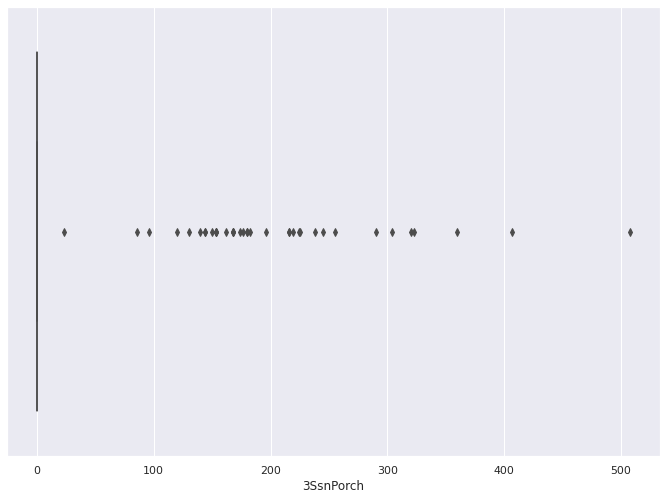

In [205]:
sns.boxplot(x=df["3SsnPorch"])

In [206]:
df["3SsnPorch"].isna().sum() / len(df)

0.0

## ScreenPorch (Площадь крыльца экрана в квадратных футах)

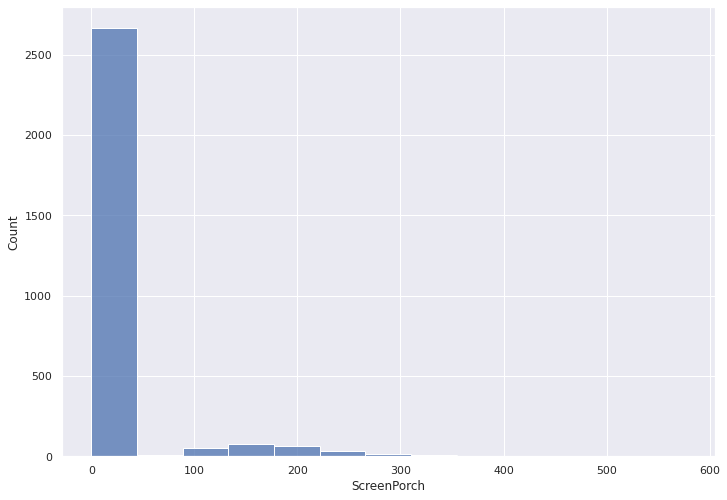

In [207]:
sns.histplot(x=df["ScreenPorch"])

In [208]:
df["ScreenPorch"].isna().sum() / len(df)

0.0

## PoolArea (Площадь бассейна в квадратных футах)

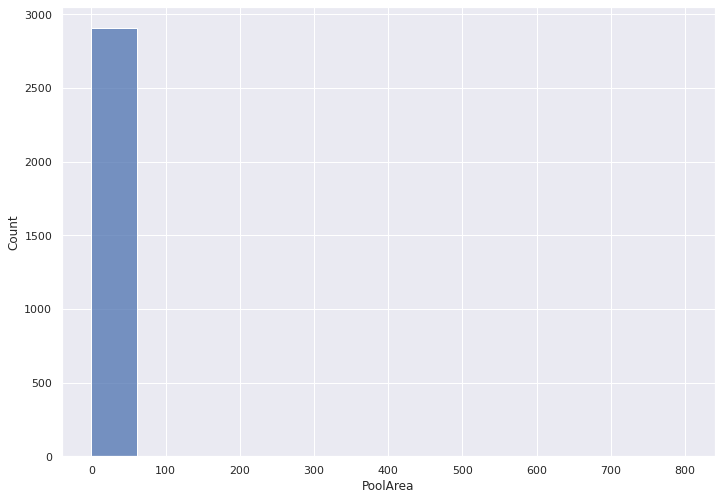

In [209]:
sns.histplot(x=df["PoolArea"])

In [210]:
df["PoolArea"].isna().sum() / len(df)

0.0

In [211]:
df["PoolExt"] = (df["PoolArea"] > 0).astype(int)

## PoolQC (Качество бассейна)

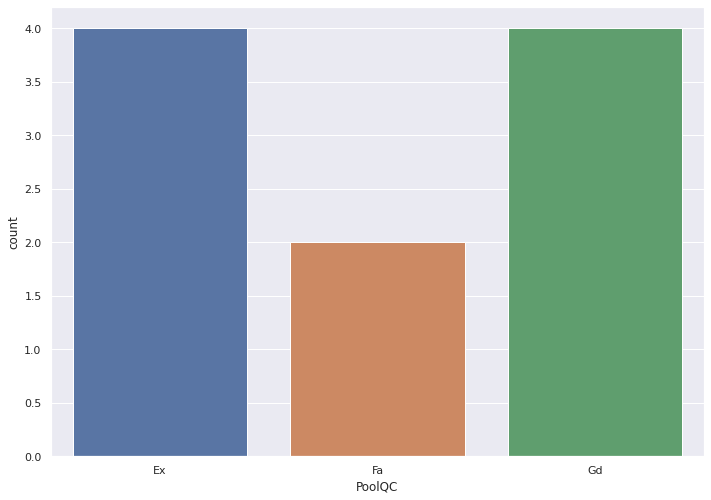

In [212]:
sns.countplot(x=df["PoolQC"])

In [213]:
df["PoolQC"].value_counts(dropna=False)

NaN    2909
Ex        4
Gd        4
Fa        2
Name: PoolQC, dtype: int64

In [214]:
df["PoolQC"].fillna("NA", inplace=True)
df["PoolQC"] = le.fit_transform(df["PoolQC"])

## Fence (Качество забора)

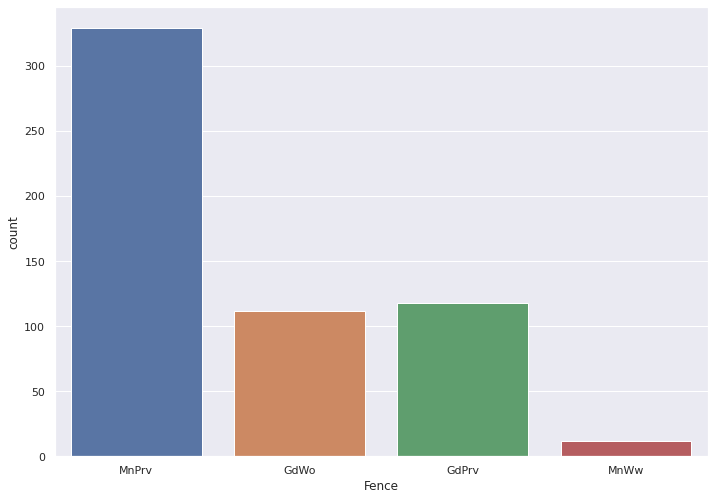

In [215]:
sns.countplot(x=df["Fence"])

In [216]:
df["Fence"].value_counts(dropna=False)

NaN      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [217]:
df["Fence"].fillna("NA", inplace=True)
df["Fence"] = le.fit_transform(df["Fence"])

## MiscFeature (Разное функция, не охватываемая другими категориями)

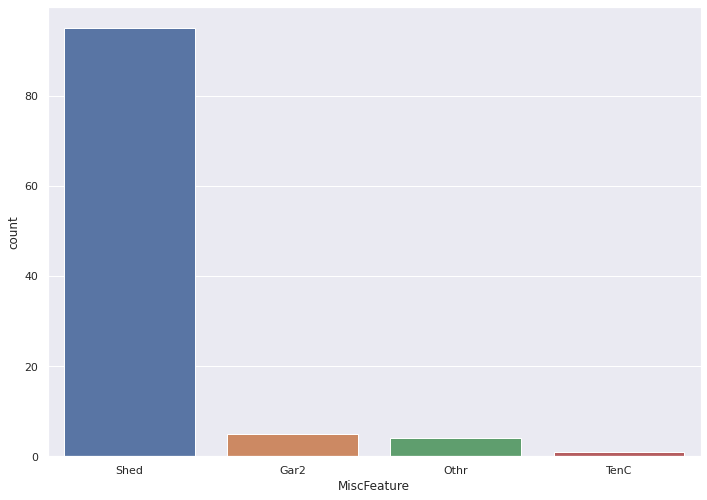

In [218]:
sns.countplot(x=df["MiscFeature"])

In [219]:
df["MiscFeature"].value_counts(dropna=False)

NaN     2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [220]:
df["MiscFeature"].fillna("NA", inplace=True)
df["MiscFeature"] = le.fit_transform(df["MiscFeature"])

## MiscVal (Значение функции miscellaneous)

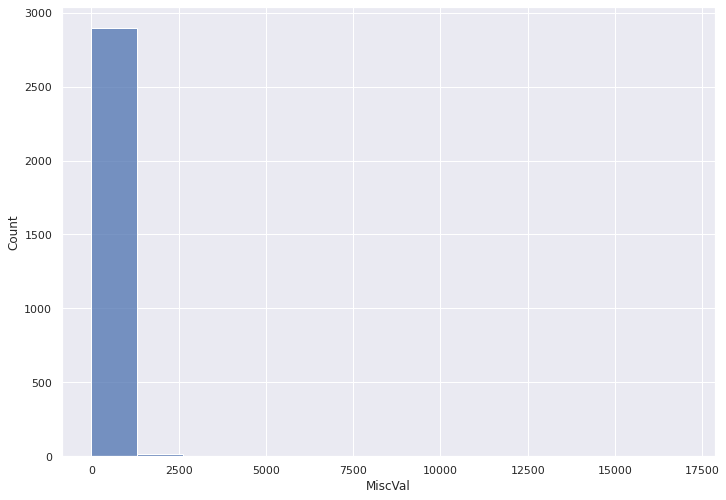

In [221]:
sns.histplot(x=df["MiscVal"])

In [222]:
df["MiscVal"].isna().sum() / len(df)

0.0

## MoSold (Месяц продажи)

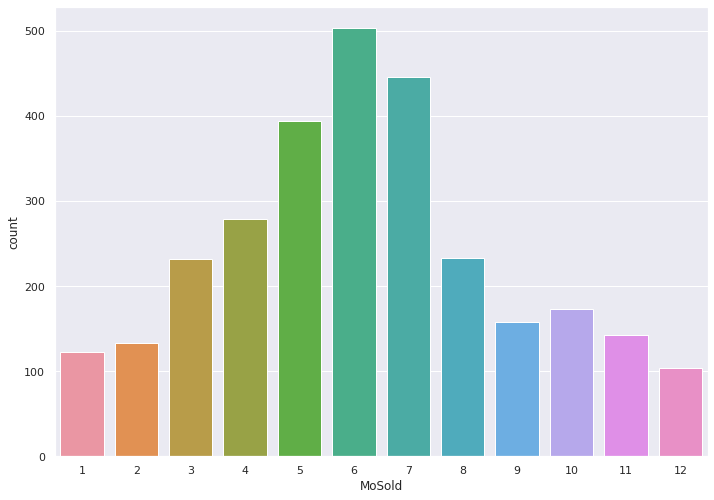

In [223]:
sns.countplot(x=df["MoSold"])

In [224]:
df["MoSold"].value_counts(dropna=False)

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

## YrSold (Год продажи)

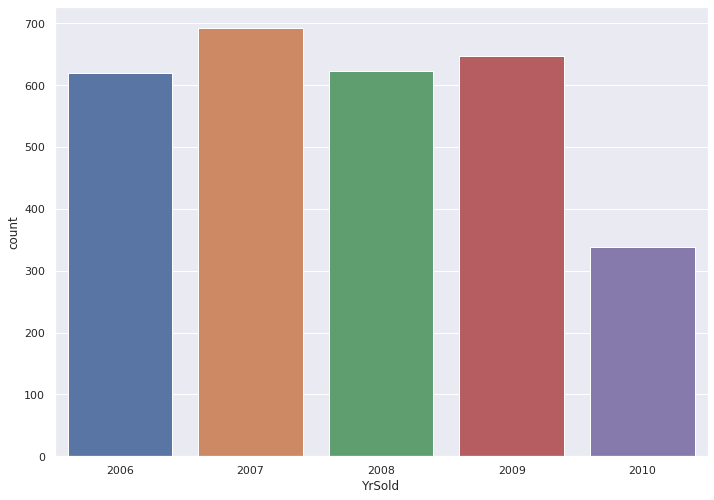

In [225]:
sns.countplot(x=df["YrSold"])

In [226]:
df["YrSold"].value_counts(dropna=False)

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

In [227]:
df["YrSold"] = le.fit_transform(df["YrSold"])

## SaleType (Тип продажи)

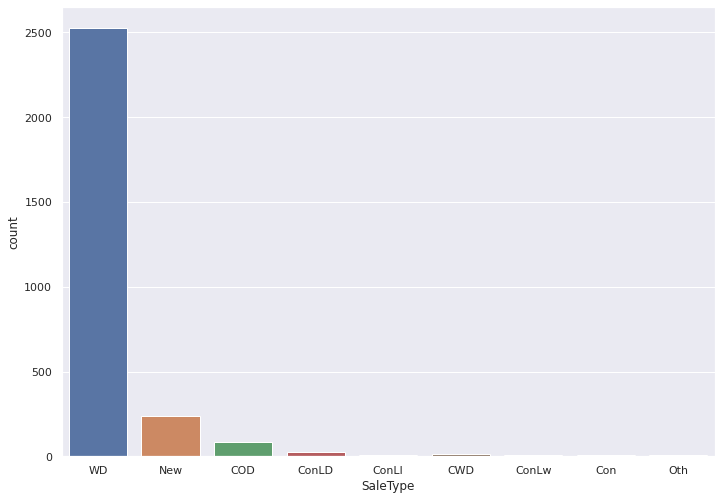

In [228]:
sns.countplot(x=df["SaleType"])

In [229]:
df["SaleType"].value_counts(dropna=False)

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64

In [230]:
df["SaleType"].fillna("Oth", inplace=True)
df["SaleType"] = le.fit_transform(df["SaleType"])

## SaleCondition (Условия продажи)

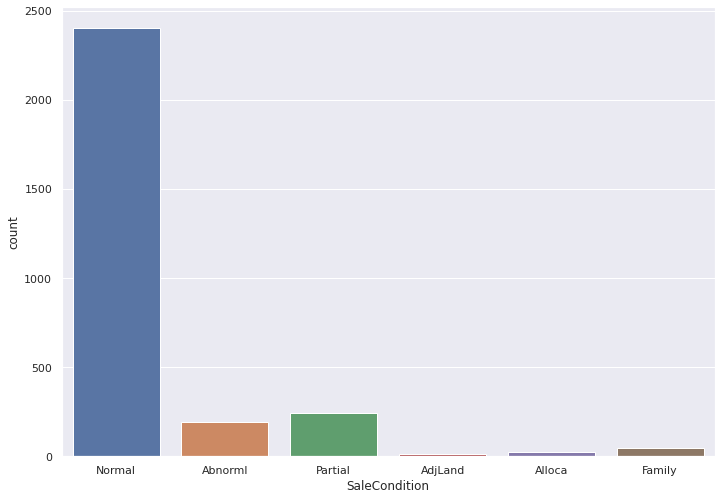

In [231]:
sns.countplot(x=df["SaleCondition"])

In [232]:
df["SaleCondition"].value_counts(dropna=False)

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [233]:
df["SaleCondition"] = le.fit_transform(df["SaleCondition"])

## TotalLivBsmtSF (Обща площадь подвала + 1, 2 этажа)

In [234]:
df["TotalLivBsmtSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]

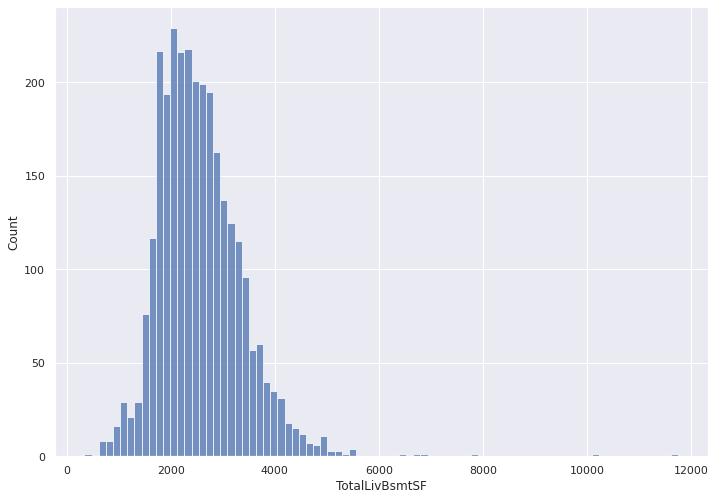

In [235]:
sns.histplot(x=df["TotalLivBsmtSF"])

# Подготовка выборок

In [236]:
# https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard?scriptVersionId=1955054&cellId=21
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

In [237]:
y = df["SalePrice"]
X = df.drop(["SalePrice"], axis=1)
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BsmtSFExt,2ndFlrExt,PoolExt,TotalLivBsmtSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,110,53,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706.0,6,0.0,150.0,856.0,1,0,...,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,95,2,2,548.0,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2,8,4,1,1,0,2566.0
2,0,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,83,26,1,1,8,8,3,0.0,3,4,1,2,4,1,0,978.0,6,0.0,284.0,1262.0,1,0,...,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,68,2,2,460.0,5,5,2,298,0,0,0,0,0,3,4,1,0,5,1,8,4,1,0,0,2524.0
3,5,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,108,52,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486.0,6,0.0,434.0,920.0,1,0,...,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,93,2,2,608.0,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2,8,4,1,1,0,2706.0
4,6,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,25,20,1,1,13,15,3,0.0,3,4,0,4,1,4,0,216.0,6,0.0,540.0,756.0,1,2,...,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,90,3,3,642.0,5,5,2,0,35,272,0,0,0,3,4,1,0,2,0,8,0,1,1,0,2473.0
5,5,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,107,50,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,1,0,...,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,92,2,3,836.0,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2,8,4,1,1,0,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,13,4,21.0,1936,1,2,3,3,0,4,0,10,2,2,3,5,4,7,77,20,1,1,5,5,3,0.0,3,4,1,4,4,4,6,0.0,6,0.0,546.0,546.0,1,2,...,546,0,1092,0,0,1,1,3,1,3,5,6,0,3,6,0,1,0,0.0,3,3,2,0,0,0,0,0,0,3,4,1,0,6,0,8,4,1,1,0,1638.0
2916,13,4,21.0,1894,1,2,3,3,0,4,0,10,2,2,4,5,4,5,77,20,1,1,5,5,3,0.0,3,4,1,4,4,4,5,252.0,6,0.0,294.0,546.0,1,4,...,546,0,1092,0,0,1,1,3,1,3,6,6,0,3,4,62,3,1,286.0,5,5,2,0,24,0,0,0,0,3,4,1,0,4,0,8,0,1,1,0,1638.0
2917,0,3,160.0,20000,1,2,3,3,0,4,0,11,2,2,0,2,5,7,67,46,1,1,12,13,3,0.0,3,4,1,4,4,4,0,1224.0,6,0.0,0.0,1224.0,1,0,...,0,0,1224,1,0,1,0,4,1,3,7,6,1,5,5,52,3,2,576.0,5,5,2,474,0,0,0,0,0,3,4,1,0,9,0,8,0,1,0,0,2448.0


In [238]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      2919 non-null   int64  
 1   MSZoning        2919 non-null   int64  
 2   LotFrontage     2919 non-null   float64
 3   LotArea         2919 non-null   int64  
 4   Street          2919 non-null   int64  
 5   Alley           2919 non-null   int64  
 6   LotShape        2919 non-null   int64  
 7   LandContour     2919 non-null   int64  
 8   Utilities       2919 non-null   int64  
 9   LotConfig       2919 non-null   int64  
 10  LandSlope       2919 non-null   int64  
 11  Neighborhood    2919 non-null   int64  
 12  Condition1      2919 non-null   int64  
 13  Condition2      2919 non-null   int64  
 14  BldgType        2919 non-null   int64  
 15  HouseStyle      2919 non-null   int64  
 16  OverallQual     2919 non-null   int64  
 17  OverallCond     2919 non-null   i

In [239]:
X_test = X[X.index.isin(test.index)]

y = y[y.index.isin(train.index)]
X = X[X.index.isin(train.index)]

X.shape, y.shape, X_test.shape

((1460, 83), (1460,), (1459, 83))

In [240]:
cat_features = list(set(X.columns) - set(X._get_numeric_data().columns))
cat_features

[]

# Обучение моделей

## Оптимизация гиперпараметров

In [241]:
model_params = {"random_seed": 42, "logging_level": "Silent"}
model = CatBoostRegressor(**model_params)

In [242]:
# https://effectiveml.com/using-grid-search-to-optimise-catboost-parameters.html
grid_params = {
    "depth": [3, 1, 2, 6, 4, 5, 7, 8, 9, 10],
    "iterations": [250, 100, 500, 1000],
    "learning_rate": [0.03, 0.001, 0.01, 0.1, 0.2, 0.3],
    "l2_leaf_reg": [3, 1, 5, 10, 100],
}

In [243]:
grid_search_result = model.randomized_search(
    grid_params, Pool(X, y, cat_features=cat_features), verbose=False
)

In [244]:
best_model_params = grid_search_result["params"]
best_model_params.update(model_params)
best_model_params

{'depth': 1,
 'iterations': 1000,
 'l2_leaf_reg': 10,
 'learning_rate': 0.2,
 'logging_level': 'Silent',
 'random_seed': 42}

## KFold

In [245]:
rkf = RepeatedKFold(random_state=42)

In [246]:
models, scores = [], defaultdict(list)

x_seed = 0
for train_index, valid_index in rkf.split(X):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    train_pool = Pool(X_train, y_train, cat_features=cat_features)
    valid_pool = Pool(X_valid, y_valid, cat_features=cat_features)

    model_params["random_seed"] = ++x_seed

    model = CatBoostRegressor(**model_params)
    model.fit(train_pool, eval_set=valid_pool, verbose=False)

    print(model.get_best_score())
    models.append(model)

    scores["learn"].append(model.get_best_score()["learn"]["RMSE"])
    scores["validation"].append(model.get_best_score()["validation"]["RMSE"])

best_model = sum_models(models, weights=[1.0 / len(models)] * len(models))
best_model = to_regressor(best_model)
best_model

{'learn': {'RMSE': 0.02397567511227086}, 'validation': {'RMSE': 0.13169321191705533}}
{'learn': {'RMSE': 0.025244904091851903}, 'validation': {'RMSE': 0.11031217937960049}}
{'learn': {'RMSE': 0.02525240936448161}, 'validation': {'RMSE': 0.15155176084706498}}
{'learn': {'RMSE': 0.02529257297815567}, 'validation': {'RMSE': 0.1225587723438141}}
{'learn': {'RMSE': 0.02588125714509915}, 'validation': {'RMSE': 0.10748140919321339}}
{'learn': {'RMSE': 0.024187716493651375}, 'validation': {'RMSE': 0.11668208442174761}}
{'learn': {'RMSE': 0.025798913407798354}, 'validation': {'RMSE': 0.11380366268055056}}
{'learn': {'RMSE': 0.023509793239426084}, 'validation': {'RMSE': 0.1156293124295104}}
{'learn': {'RMSE': 0.025134600168635467}, 'validation': {'RMSE': 0.13134245957369842}}
{'learn': {'RMSE': 0.02504547349897327}, 'validation': {'RMSE': 0.13041432026578495}}
{'learn': {'RMSE': 0.02425749794572059}, 'validation': {'RMSE': 0.13274159483895717}}
{'learn': {'RMSE': 0.024115945340945737}, 'validati

## Выделение самых значимых признаков

In [247]:
column_scores = pd.DataFrame(
    {"Column": X.columns, "Score": best_model.get_feature_importance()}
).sort_values("Score", ascending=False)
column_scores[:25]

,Column,Score
82,TotalLivBsmtSF,18.889374
16,OverallQual,17.268118
45,GrLivArea,6.527343
19,YearRemodAdd,3.438907
3,LotArea,3.376884
18,YearBuilt,3.240599
17,OverallCond,2.867383
55,Fireplaces,2.333643
37,TotalBsmtSF,2.306296
58,GarageYrBlt,2.179231


# Сохранение результатов

In [248]:
submission = pd.DataFrame(
    {"Id": X_test.index, "SalePrice": np.expm1(best_model.predict(X_test))}
).set_index("Id")
submission

,SalePrice
Id,
1461,125223.707878
1462,161700.280571
1463,186840.408449
1464,194282.852661
1465,185654.797558
...,...
2915,81526.735411
2916,82944.562657
2917,161618.345422


In [249]:
submission.to_csv("submission.csv")